# Credit Card Fraud Detection

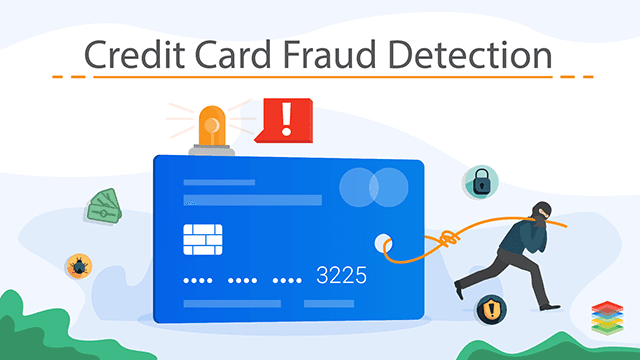

## Import the usual libraries to startwith

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # importing the google drive

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

### 1.Reading the files

- The files has been downloaded from the link https://www.kaggle.com/datasets/kartik2112/fraud-detection
- The download link provided in : https://learn.upgrad.com/course/1976/segment/29972/179049/549945/2819567

The files present in the kaggle dataset (given above)

1. fraudTrain.csv ~ 352 MB
2. fraudTest.csv ~ 150 MB

Note : **Since the file is already split between train and test, we will learn from the given train data and validate our learnings from the test data**

In [ ]:
train_file_path = '/content/drive/MyDrive/Upgrad/Capstone Project/dataset/fraudTrain.csv'
test_file_path = '/content/drive/MyDrive/Upgrad/Capstone Project/dataset/fraudTest.csv'

train_data = pd.read_csv(train_file_path) # reading the train data
test_data = pd.read_csv(test_file_path) # reading the test data

In [ ]:
# lets check the length train and test datasets
# train-test split is already taken place in the dataset level itself

a = len(train_data)
b = len(test_data)

print('Number of records in the train dataset : ',a)
print('Number of records in the test dataset : ',b)
print('Train vs Test ratio : ', 100 - 100*round(b/a,1),'% : ',100*round(b/a,1),'%')

Number of records in the train dataset :  1296675
Number of records in the test dataset :  555719
Train vs Test ratio :  60.0 % :  40.0 %


### 2.Concating the Train & Test Datasets ( for preprocessing )

- 2.1 Concatenate the train and test datasets for `data cleaning and data preperations`
- 2.2 The concatenated dataset will have a `label indicating a record belong to which data set = train or test`
- 2.3 Once the dataset is reday for modeiling, `we will split the dataset back to train and test besed on the above label`



In [ ]:
# creating the test and train label in the respective datasets, so that we can split the train test data set after completing the data-cleaning steps

train_data['split_label'] = 'train' 
test_data['split_label'] = 'test'

> **2.1 - Concating the train and test datasets**

In [ ]:
# concating the train and the test data

data = pd.concat([train_data,test_data], axis = 0)
data.shape

(1852394, 24)

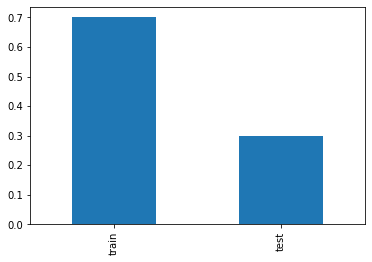

In [ ]:
# lets visualise the proportion of the train-test dataset

data['split_label'].value_counts(normalize = True).plot(kind = 'bar');

### 3.Inspecting the structure of the DataSet

- 3.1 understand the shape of the dataset
- 3.2 check the datatypes of the columns 
- 3.3 check any missing values are present in the dataset
- 3.4 look at the head of the dataframe
- 3.5 inspect the target variable distribution

> **3.1 - Understand the shape of the dataset**

In [ ]:
data.shape

(1852394, 24)

> **3.2 - Check the datatype of the columns**

In [ ]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
split_label               object
dtype: object

> **3.3 - Check the missing values in the dataset**

In [ ]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
split_label              0
dtype: int64

> **3.4 - look at the head of the datsaframe**

In [ ]:
data.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,split_label
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,train
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,train
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,train


> **3.5 - Inspect the target variable distribution**

,count,distribution
genuine,1842743,99.478999
fraud,9651,0.521001


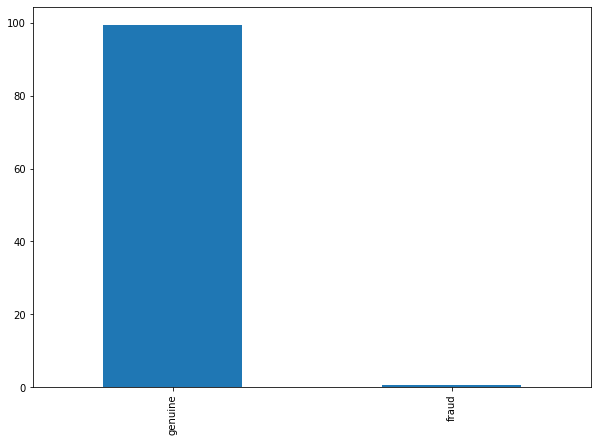

In [ ]:
a = data['is_fraud'].value_counts().rename('count') # count of classes
b = (data['is_fraud'].value_counts(normalize = True)*100).rename('distribution') # normalisation of the classes
tem = pd.concat([a,b], axis = 1)
tem.index = ['genuine','fraud']
tem['distribution'].plot(kind = 'bar', figsize = [10,7]);
tem

Inference on inspecting the dataset :

- There are `24 columns` in the dataframe (including the `unnamed 0` and `split-label` columns)
- Target varible is `is_fraud`
- Some of the variables `reqires type-casting` before further proceeding, for example `trans_date_trans_time` and `dob` are currently string-columns which need to be type-casted to pandas datetime object
- No null values present in the dataset (all columns - all values are available for train as well as the test datasets)

**Inference on Inspecting the Target variable:** 

- The dataset id `Severely imbalanced`, hence there is a class imbalance problem
- The majority class, the `non-fraud` class contributes about 99.42 %
- The minority class, in this case the positive class `fraud` contributes only `0.58%` 

**What we can do** : 

- we should involve nesecceary proceses to mitigate the class imbalance problem like `SMOTE` or `ADASYS`
- Choose the right metric for evaluating the model 
- In the given context, any random model can predict the classes with 99 % accuracy, hence `accuracy is not the right metric` to evaluate the model, we should go for the `roc_auc` instead , which is the measureof `TruePostive` and `TrueNegative`.

## 4.Basic Data Cleaning

- 4.1 Drop the duplicate records in the train dataset
- 4.2 Type cast the varibles wherever required
- 4.3 Lets check the cardinality of the category columns
- 4.4 Transform the the categprical columns to reduce the cadinality
- 4.5 Select and drop the reduntant columns

> **4.1 - Drop the duplicated records**

In [ ]:
# check for the duplicated records.
data.duplicated().sum()

0

Note : Looks like no records are found to be dupicated, so that to be dropped

> **4.2 - Type cast the necessary variables**

In [ ]:
# trans_date_trans_time to pandas datetime

data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])
data['trans_date_trans_time'].head(3)

0   2019-01-01 00:00:18
1   2019-01-01 00:00:44
2   2019-01-01 00:00:51
Name: trans_date_trans_time, dtype: datetime64[ns]

In [ ]:
# dob to pandas datetime

data['dob'] = pd.to_datetime(data['dob'])
data['dob'].head(3)

0   1988-03-09
1   1978-06-21
2   1962-01-19
Name: dob, dtype: datetime64[ns]

> **4.3 - Lets look at the cardinality of the varibles in the dataframe**

In [ ]:
cat_cols = data.select_dtypes(include = 'object').columns # selecting the categorical columns

for col in cat_cols:

  data[col] = data[col].str.lower().str.strip() # cleaning the categorical columns with strings methods

data[cat_cols].nunique().sort_values()

gender               2
split_label          2
category            14
state               51
first              355
last               486
job                497
merchant           693
city               906
street             999
trans_num      1852394
dtype: int64

> **4.4 Choosing the columns to be Dropped**

- indexes/record id's
- customer labels such as name, job ( job is highly cardinal cannot be grouped)
- merchant labels such as merchant name
- other categorical columns with high cadinalities which cannot be grouped / cannot be encoded

In [ ]:
drop_cols = ['Unnamed: 0','street','merchant','zip','first','last','trans_num','job'] # list of columns to be dropped
data.drop(drop_cols, axis =1, inplace = True)
list(data.columns) # printing the remaining columns after dropping

['trans_date_trans_time',
 'cc_num',
 'category',
 'amt',
 'gender',
 'city',
 'state',
 'lat',
 'long',
 'city_pop',
 'dob',
 'unix_time',
 'merch_lat',
 'merch_long',
 'is_fraud',
 'split_label']

Note : We are Keeping some columns to columns to be dropped later on after the feature extraction

## 5. Feature Extraction ( Arriving New Features )

- 5.1. Extract features from `trans_date_trans_time`
- 5.2. Extract features from `unix_time`
- 5.3. Extract features from `dob`
- 5.4. Extract features from `merchant lat-long` and `card holder lat-long`
- 5.5. Delete the reduntant features after feature extraction



> **5.1 Features from `trans_date_trans_time`**

- `transaction_hour`
- `transaction_month`
- `*transaction_dayname*`


In [ ]:
# extract the transaction hour column

data['trans_hour'] = data['trans_date_trans_time'].dt.hour  # extracting the hour component using the dt accessor

data['trans_hour'].unique() # printing the unique values in the extracted series

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

In [ ]:
# extract transaction month column

data['trans_month'] = data['trans_date_trans_time'].dt.month # extracting the month number component using the dt accessor

data['trans_month'].unique() # printing the unique values in the extracted series

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
# the extract the boolean if the date of transaction is weekend or not

data['trans_dayofweek'] = data['trans_date_trans_time'].dt.day_name() # extracting the day name component using the dt accessor

data['trans_dayofweek'].unique() # printing the unique values in the extracted series

array(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'], dtype=object)

> **5.2 Features from `unix_time`**

> `Note`: unitx time is the date and time representation widely used in computing. It measures time by the number of seconds that have elapsed since 00:00:00 UTC on 1 January 1970, the beginning of the Unix (Unix OS) epoch.

- calculate the `time delay between the previouse and currant transaction`

In [ ]:
# lets look at the summary of the creit card transactions

data.groupby(['cc_num'])['cc_num'].count().sort_values(ascending = False).describe().astype(int)

count     999
mean     1854
std      1175
min         6
25%       740
50%      1471
75%      2917
max      4392
Name: cc_num, dtype: int64

> **Inference :** 

- There are 999 credt cards transaction are recorded
- Each credict card has been utilised mutiple times (average of 1854 times)
- min - 6 times , max - 4392 times
- Hence it is important to understand the delay betweem the previouse transaction and the current transaction for a credit cards in each record

In [ ]:
# sort the dataframe on transaction datetime & cc_num

data.sort_values(by = ['cc_num','unix_time'], ascending = True, inplace = True)

In [ ]:
# unix_time for the previouse transaction using the shift method in pandas

data['unix_time_prev_trans'] = data.groupby(by = ['cc_num'])['unix_time'].shift(1)

In [ ]:
# For the first transactions-records all the credit cards, the previouse unit time will be null
# we dont want any null values to be present in the variable as we are going to feed the dataset into machine learning models where null values are not expected
# for all the rows with null values, we are filling with the current unit time value - 86400 (number of seconds in a day)

data['unix_time_prev_trans'].fillna(data['unix_time'] - 86400, inplace = True)

In [ ]:
# calculatig the time delay between the previouse and current transaction - converting the variable into to mins

data['timedelta_last_trans'] = (data['unix_time'] - data['unix_time_prev_trans'])//60

> **5.3 Features from `dob`**

- Age of the card holder

In [ ]:
# lets look the variable

data['dob'].head()

1017   1986-02-17
2724   1986-02-17
2726   1986-02-17
2882   1986-02-17
2907   1986-02-17
Name: dob, dtype: datetime64[ns]

> calculating the age at the date of the transaction = `dob` - `trans_date_trans_time`

In [ ]:
data['cust_age'] = (data['trans_date_trans_time'] - data['dob']).astype('timedelta64[Y]') # calculting the age in days and converting it into years

data['cust_age'].head() # lets look at the newly arrived age column

1017    32.0
2724    32.0
2726    32.0
2882    32.0
2907    32.0
Name: cust_age, dtype: float64

> **5.4 Features from `merchant lat-log` and `card holder lat-long`**

- lat distance between the customer loctaion and merchant location
- long distance between the customer loctaion and merchant location
- lat distance between the current merchant location and the previous merchant location
- long distance between the current merchant location and the previous merchant location

> Calculate the lat distance between the customer and current merchant

In [ ]:
data['lat_dist_cust_merch'] = (data['lat'] -data['merch_lat']).abs()
data['lat_dist_cust_merch'].head(3)

1017    0.969911
2724    0.986034
2726    0.043465
Name: lat_dist_cust_merch, dtype: float64

> Calculate the long distance between the customer and current merchant

In [ ]:
data['long_dist_cust_merch'] = (data['long'] -data['merch_long']).abs()
data['long_dist_cust_merch'].head(3)

1017    0.845504
2724    0.147772
2726    0.261164
Name: long_dist_cust_merch, dtype: float64

> Get the lat and long values of the previouse merchant

In [ ]:
data['prev_merch_lat'] = data.groupby(by = ['cc_num'])['merch_lat'].shift(1) # latitude of the previouse merchant with pandas shift method

data['prev_merch_long'] = data.groupby(by = ['cc_num'])['merch_long'].shift(1) # longitude of the previouse merchant with pandas shift method

> Fill the null values ( for all initial transctions 999 numbers ) with the lat long values of the current merchant

In [ ]:
data['prev_merch_lat'].fillna(data['merch_lat'], inplace = True)

data['prev_merch_long'].fillna(data['merch_long'], inplace = True)

> Calculate the distnace between the current and the previouse merchant

In [ ]:
data['lat_dist_prev_merch'] = (data['merch_lat'] - data['prev_merch_lat']).abs() # calculate and convert into absolute value

data['lat_dist_prev_merch'].head(3) # lets look at the newly arrived variable 

1017    0.000000
2724    1.955945
2726    0.942569
Name: lat_dist_prev_merch, dtype: float64

> Calculate the distnace between the current and the previouse merchant

In [ ]:
data['long_dist_prev_merch'] = (data['merch_long'] -data['prev_merch_long']).abs() # calculate and convert into absolute value

data['long_dist_prev_merch'].head(3) # lets look at the newly arrived variable 

1017    0.000000
2724    0.697732
2726    0.113392
Name: long_dist_prev_merch, dtype: float64

> **5.5 Delete the redundant Features / Columns**

- `trans_date_trans_time`
- `cc_num`
- `unix_time`
- `unix_time_prev_trans`
- `dob`
- `lat`
- `long`
- `merch_lat`
- `merch_long`
- `prev_merch_lat`
- `prev_merch_long`

In [ ]:
# list of the columns to be dropped

drop_cols2 = ['trans_date_trans_time','cc_num','unix_time','unix_time_prev_trans','lat',
              'long','merch_lat','merch_long','prev_merch_lat','prev_merch_long','dob','city']

> Dropping the list of columns which are now redundant in the dataset

In [ ]:
data.drop(drop_cols2, axis = 1, inplace = True)
data.reset_index(drop=True, inplace = True)
list(data.columns) # lets look at the remaining list of columns

['category',
 'amt',
 'gender',
 'state',
 'city_pop',
 'is_fraud',
 'split_label',
 'trans_hour',
 'trans_month',
 'trans_dayofweek',
 'timedelta_last_trans',
 'cust_age',
 'lat_dist_cust_merch',
 'long_dist_cust_merch',
 'lat_dist_prev_merch',
 'long_dist_prev_merch']

### 6.Variable Analysis and Visualization

- 6.1 create the subset dataframes for fraud and normal transactions for ease the exploration
- 6.2 creare the necessary functions so that those can be using over and again
- 6.3 visualization and inferences


> **6.1 create subset of dataframes**

In [ ]:
all_trans = data.copy() # create a copy dataset fof the base dataset

all_trans['class'] = all_trans['is_fraud'].map({1:'Fraud',0:'Non_Fraud'}) # mapping the classes 0 & 1 to genuine and fraud

normal = all_trans[data['is_fraud'] == 0] # create the normal transaction dataset

fraud = all_trans[data['is_fraud'] == 1] # create a fruad transaction dataset

> **6.2 create functions for peformimg the analysis**

- function to show simple stats by class
- function to show simple stats by variable
- function plot the box plots
- function to normaize the count by the class

> Function to show simple stats by class

In [ ]:
def stats_by_class(variable):
  stat_grid = all_trans.groupby('class')[variable].agg([np.min,np.max,np.mean,np.median])
  stat_grid = stat_grid.transpose().round(2)
  return stat_grid

> Fuction to show simple stats by variable

In [ ]:
def stats_by_var(variable):

  n = (normal[variable].value_counts(normalize = True)*100).round(2).rename('normal')
  f = (fraud[variable].value_counts(normalize = True)*100).round(2).rename('fraud')
  return pd.concat([n,f], axis = 1).transpose()

> Functing for plotting the boxplot

In [ ]:
def plot_box (data, x, y, title , width = 10, height = 7):
  
  plt.figure(figsize = [width,height])
  sns.boxplot(data = data, x = x, y = y)
  plt.title(title);

> Function for plotting the normalized the count by class

In [ ]:
def normalize_count_by_class(variable, width = 20, height = 7):

  plt.figure(figsize = [width,height])

  normalized_normal = (normal.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized value for normal transactions 

  normalized_fraud = (fraud.groupby('class')[variable].value_counts(normalize = True)*100).rename('value').reset_index() # calculate the normalized valued for the fraud transactions

  plot_table = pd.concat([normalized_normal.set_index(variable)[['class','value']],
                             normalized_fraud.set_index(variable)[['class','value']]], axis = 0).reset_index()
  
  sns.barplot(data = plot_table, x = variable, y = 'value', hue = 'class')
  plt.title('\nNormalized frequency of the varible < '+variable+' > on both classes\n')
  plt.xticks(rotation = 30);

  summary_table = pd.concat([normalized_normal.set_index(variable)['value'],
                             normalized_fraud.set_index(variable)['value']],
                            axis = 1).reset_index()

  summary_table.columns = [variable, 'normal', 'fraud']
  
  summary_table['diff in %'] = (summary_table['fraud'] - summary_table['normal'])

  summary_table.sort_values(by = 'diff in %', ascending = True, inplace = True)

  del normalized_normal,normalized_fraud,plot_table # delating the temperory varibale created in the function

  print('\nNormalized frequency of < '+variable+' > on both classes and the percentage diffrence\n')
  
  return summary_table

In [ ]:
# choosing ggplot as the default plotting style

plt.style.use('ggplot')

> **6.3 Visualizations and Inferences**

> **6.3.A ) `is_fraud` Class Distribution**

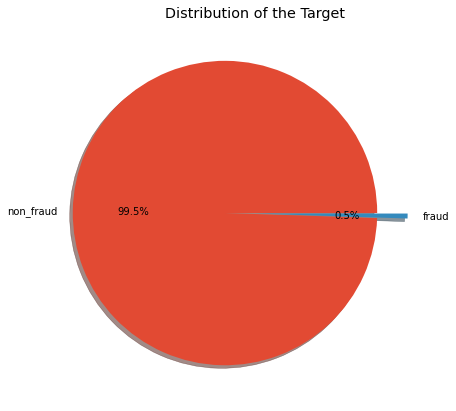

In [ ]:
plt.figure(figsize = [7,7])
plot_var = all_trans['is_fraud'].value_counts(normalize = True)
plt.pie(plot_var,
        autopct='%1.1f%%',
        labels = ['non_fraud','fraud'], 
        explode = [0.2, 0], 
        shadow = True) # plotting the pie chart
plt.title('Distribution of the Target');

**Inference :** 

- The classes are highly imbalanced, 99.5 % of the class belongs to normal transactions, and only 0.5 % contributes to the fraud transaction.

> **6.3.B ) `Gender` of the card holder by class**

,f,m
normal,54.80,45.20
fraud,50.76,49.24


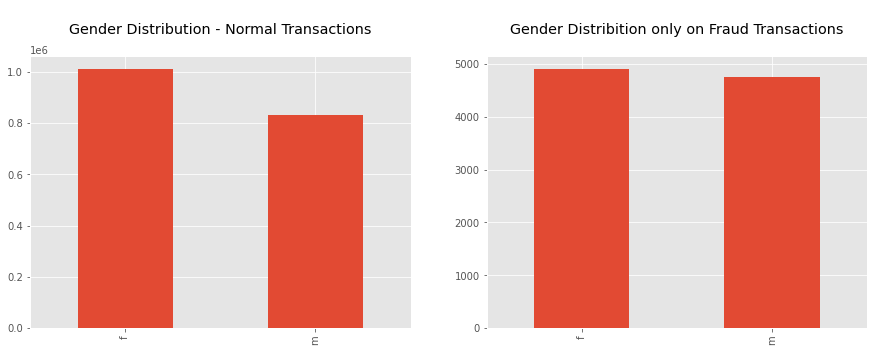

In [ ]:
# plot gender count vs taget class

plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
normal['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribution - Normal Transactions\n')

# plot gender count in fraud class

plt.subplot(1,2,2)
fraud['gender'].value_counts().plot(kind = 'bar')
plt.title('\nGender Distribition only on Fraud Transactions\n');

stats_by_var('gender') # calling the stats by var function for the gender variable

**Inference :**

- The fraud transaction is similarly distributed amoung male and female card holders.

> **6.3.C ) `Age` of the Card Holder**

class,Fraud,Non_Fraud
amin,14.00,13.00
amax,95.00,96.00
mean,48.33,45.75
median,47.00,44.00


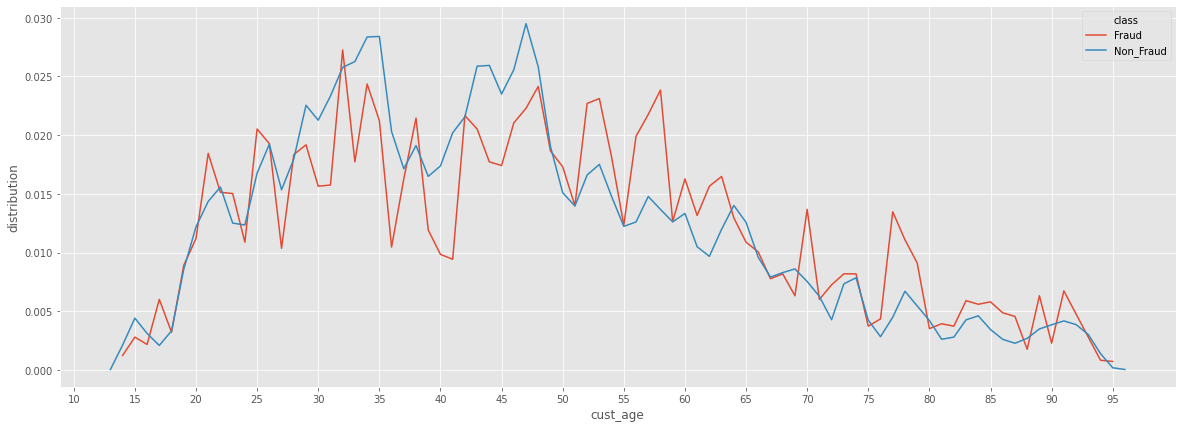

In [ ]:
plt.figure(figsize = [20,7])

trans_hour_distribution = all_trans.groupby('class')['cust_age'].value_counts(normalize = True).rename('distribution').reset_index() # count by customer age

sns.lineplot(data = trans_hour_distribution, x = 'cust_age', y = 'distribution', hue = 'class') # plotting the line plot with hue = class

plt.xticks(np.arange(10,100,5)); # modifying the xticks

stats_by_class('cust_age') # calling the stats by class function for cust_age varaible

**Inference :**

- The transctions are majorly from people whose age is in the range of 30 - 50.

- The Fraad transaction are majorly concentrated for those card holders whose are age ranges between 45 - 60 

> **6.3.D ) Amount of Transactions**

class,Fraud,Non_Fraud
amin,1.06,1.00
amax,1376.04,28948.90
mean,530.66,67.65
median,390.00,47.24


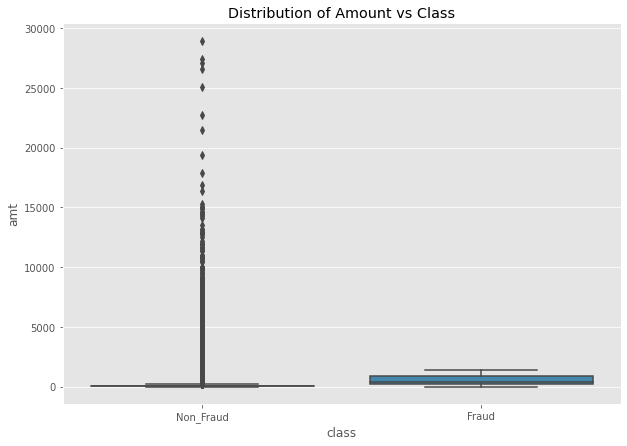

In [ ]:
plot_box(all_trans,'class','amt','Distribution of Amount vs Class'); # calling the boxplot function

stats_by_class('amt') # calling the stats_by class function

**Inferences :**

- The mean value of the fraud transactins seems to be high ~ 530$ where normal transctions is the 67 
- from the boxplot it is very clear that the fraud transaction does not have ourlier amount but the a mjority is heavily concentrated with median of 390 which is very high from the normal transactions

> **6.3.E ) Hour of Transactions**

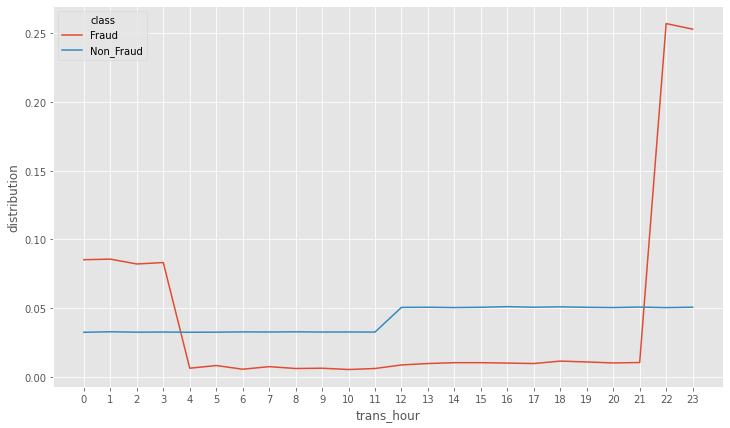

In [ ]:
plt.figure(figsize = [12,7])

trans_hour_distribution = all_trans.groupby('class')['trans_hour'].value_counts(normalize = True).rename('distribution').reset_index()

sns.lineplot(data = trans_hour_distribution, x = 'trans_hour', y = 'distribution', hue = 'class')
plt.xticks(np.arange(0,24,1))

plt.show()

**Inferences :**

- Normal Transactions are distributed similarly over the hours with slight increase from 11th hour and maintatinig the same till 23rd hour
- Fraud Transactions are majorly taking place between 21st hour - 04 hour 
- In other words, fraud transactions are happening in mid-nigh when the geniune card holders are sleeping and unable to get notified on the transaction messages

> 5. **Delay Between each Transactions**  --- *Univariate Analysis*

class,Fraud,Non_Fraud
amin,0.00,0.00
amax,14417.00,22357.00
mean,361.73,516.47
median,84.00,262.00


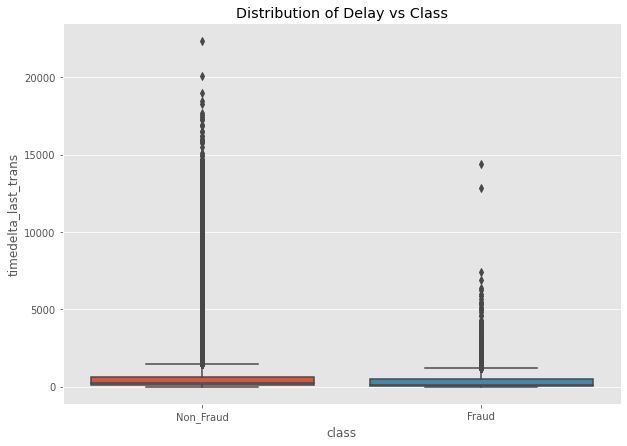

In [ ]:
plot_box(all_trans,'class','timedelta_last_trans','Distribution of Delay vs Class')
stats_by_class('timedelta_last_trans')

**Inference :**

- The Successive fraud transactions are quicky happenin compared to the other transactions

> **6.3.F ) The Weekday of the Transaction**


Normalized frequency of < trans_dayofweek > on both classes and the percentage diffrence



,trans_dayofweek,normal,fraud,diff in %
0,Monday,19.966648,15.376645,-4.590003
1,Sunday,18.564010,16.474977,-2.089034
2,Tuesday,14.601819,13.117812,-1.484008
3,Saturday,14.203500,15.469899,1.266400
6,Wednesday,9.919343,11.656823,1.737480
5,Thursday,11.147729,13.646254,2.498525
4,Friday,11.596951,14.257590,2.660639


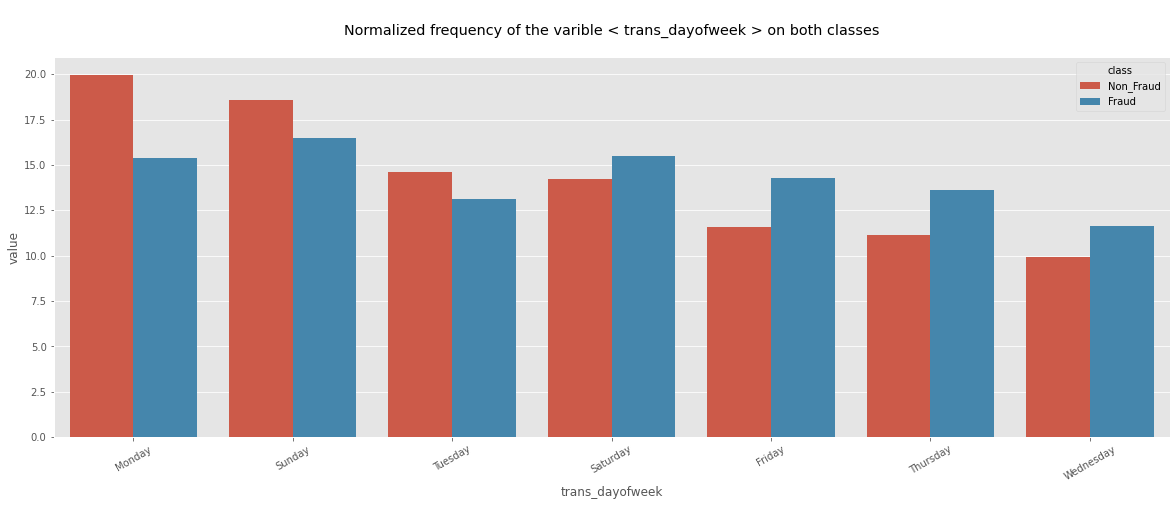

In [ ]:
normalize_count_by_class('trans_dayofweek')

**Inference :**

The normalized percentage of the fraud transactions seems to be slight higher in wednesday, thursday, friday and saturday

> **6.3.G ) Lat Distance between Customer & Merchant**

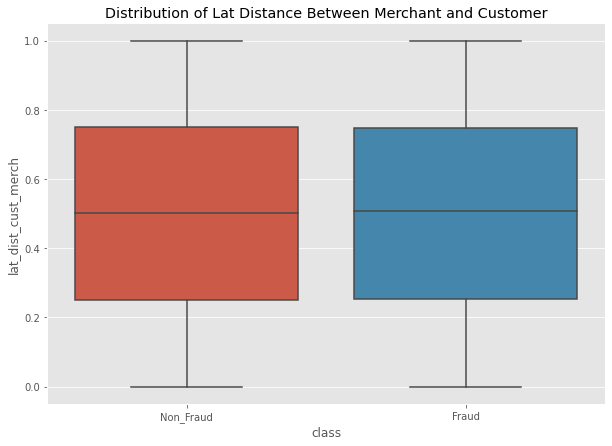

In [ ]:
plot_box(all_trans,'class','lat_dist_cust_merch','Distribution of Lat Distance Between Merchant and Customer'); # calling the boxplot function

**Inference :**

- There is no any observable difference in the overall distribution in the lat diatsnce between the customer and the merchant



> **6.3.H ) Long Distance between Customer & Merchant**

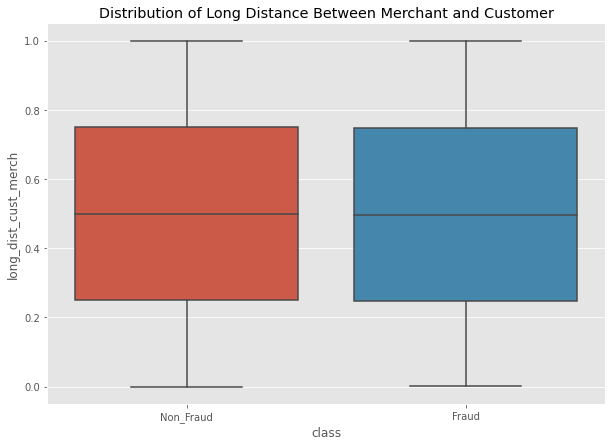

In [ ]:
plot_box(all_trans,'class','long_dist_cust_merch','Distribution of Long Distance Between Merchant and Customer'); # calling the boxplot function

**Inference :**

- There is no any observable difference in the overall distribution in the long diatsnce between the customer and the merchan

> **6.3.I ) Lat Distance between Current Customer & Prev-Merchant**

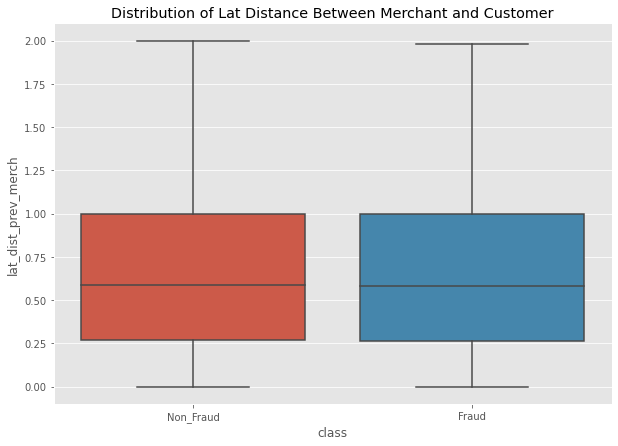

In [ ]:
plot_box(all_trans,'class','lat_dist_prev_merch','Distribution of Lat Distance Between Merchant and Customer');

**Inference :**

- There is no any observable difference in the overall distribution in the lat diatsnce between the current and the previouse merchant

> **6.3.J ) Long Distance between Current Customer & Prev-Merchant**

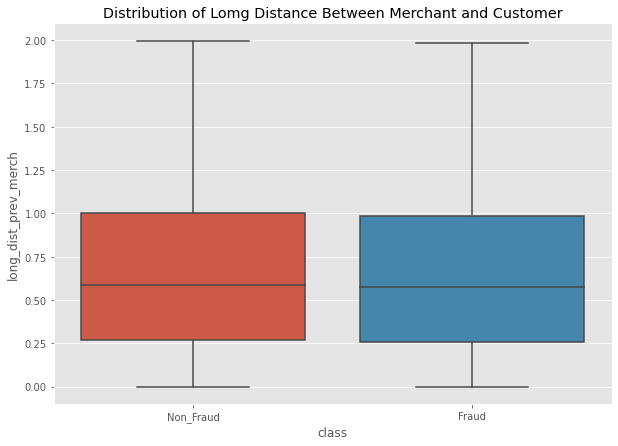

In [ ]:
plot_box(all_trans,'class','long_dist_prev_merch','Distribution of Lomg Distance Between Merchant and Customer');

**Inference :**

- There is no any observable difference in the overall distribution in the long diatsnce between the current and the previouse merchant

> **6.3.K ) Category of Item/Service Purchased**


Normalized frequency of < category > on both classes and the percentage diffrence



,category,normal,fraud,diff in %
1,home,9.507294,2.745829,-6.761465
4,kids_pets,8.759930,3.149933,-5.609998
7,food_dining,7.083136,2.124132,-4.959004
9,health_fitness,6.640535,1.916900,-4.723636
6,entertainment,7.262326,3.025593,-4.236733
8,personal_care,7.043576,3.004870,-4.038706
10,misc_pos,6.181383,3.336442,-2.844941
0,gas_transport,10.161862,7.999171,-2.162691
12,grocery_net,3.511233,1.813284,-1.697949
13,travel,3.136628,1.616413,-1.520216


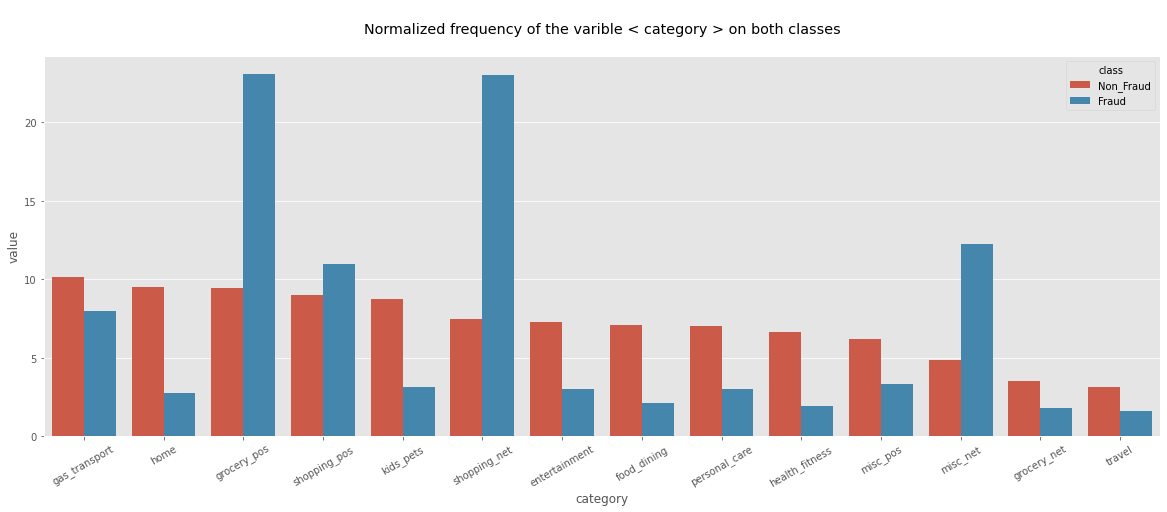

In [ ]:
normalize_count_by_class('category')

**Inference :**

- The normalized percentage of the grocery_pos, shopping_pos, shopping_net, misc_net are higher for frad transactions

> **6.3.L ) State**


Normalized frequency of < state > on both classes and the percentage diffrence



,state,normal,fraud,diff in %
0,tx,7.308507,6.134079,-1.174428
22,wv,1.974394,1.512797,-0.461597
5,mi,3.555895,3.098125,-0.457770
27,la,1.619325,1.170863,-0.448462
11,ar,2.410320,2.020516,-0.389804
12,nc,2.330168,2.020516,-0.309652
8,al,3.160669,2.880531,-0.280138
34,nd,1.144978,0.870376,-0.274602
28,wy,1.500860,1.233033,-0.267828
9,mo,2.965253,2.714745,-0.250509


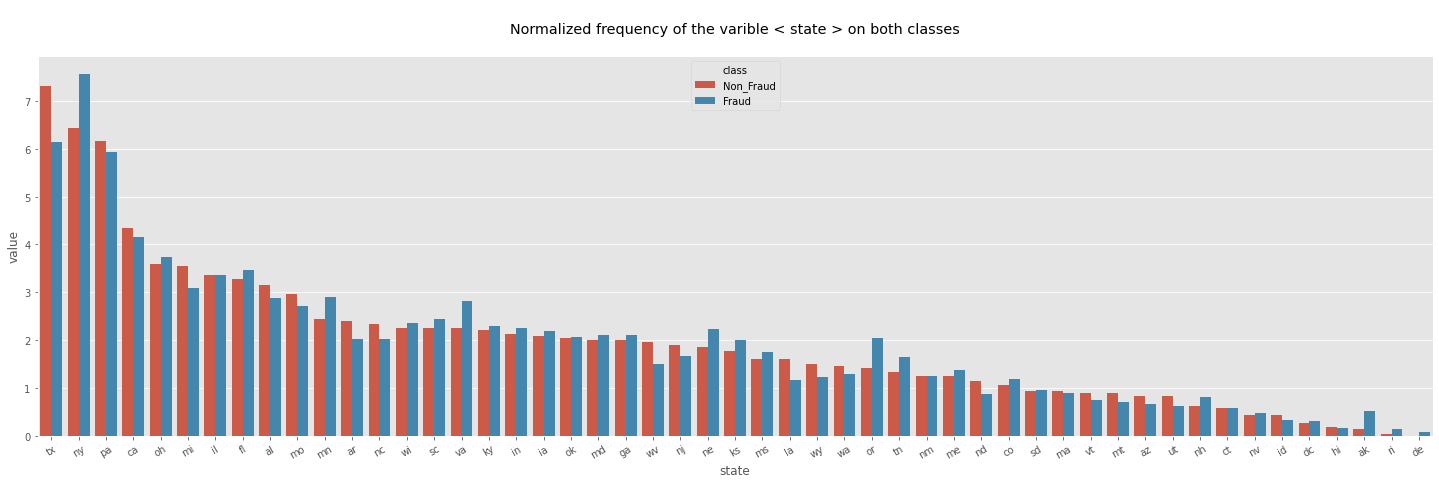

In [ ]:
normalize_count_by_class('state', width = 25)

> **6.3.L ) Correlation Matrix between the variables**

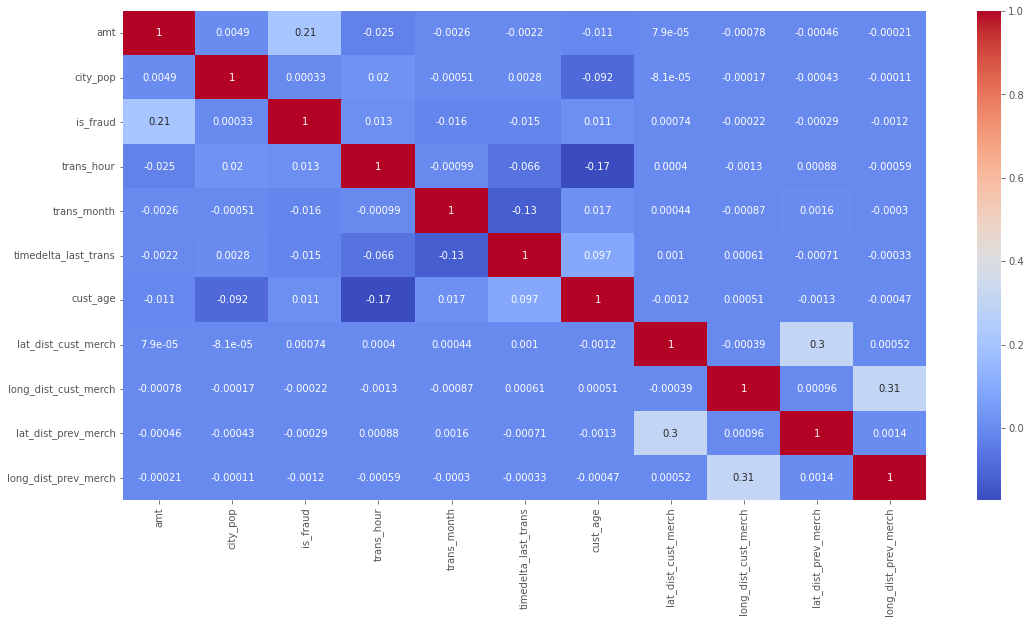

In [ ]:
fig = plt.figure(figsize=(18,9))
sns.heatmap(all_trans.corr(),cmap='coolwarm', annot=True)
plt.show()

**Inference :**

There is not much visible correlations are seen.

In [ ]:
del all_trans,normal,fraud # delete dataframes created for ploting purpose for free up the memory

### 7.Data Preprocessing

- 7.1 Splitting the train and test data sets
- 7.2 Create a symmetric train dataset based on the target variable
- 7.3 Outlier handing
- 7.4 Categorical Encoding
- 7.5 Variable Transformation
- 7.7 Feature Scalling.

> **7.1 Split the Train - Test Dataset**

- Since our original dataset were already split, `we will use not the scikit learn train_test split class` insated we will use the `split_label` column for spliting the dataset into train and test

In [ ]:
train_data = data[data['split_label'] == 'train'] # train in split label

test_data = data[data['split_label'] == 'test'] # test in split label

In [ ]:
train_data.drop('split_label', axis =1, inplace = True) # dropping the split label column

test_data.drop('split_label', axis =1, inplace = True) # dropping the split label column

In [ ]:
X_train = train_data.drop('is_fraud', axis = 1) # features for training
y_train = train_data['is_fraud'] # label for training

X_test = test_data.drop('is_fraud', axis = 1) # features for testing
y_test = test_data['is_fraud'] # lables for testing

> **7.2 Create a Symmetric train Dataset For Preprocessing**

> **Note :** Since the data is highly imbalanced, all the operations like encoding, transformations, scalling and outlier handling can get hugly biased by the train dataset

> **Strategy :** 

- Let us resample the traing data into a symmetric train dataset using the `sklearn resample class` (with 50 : 50 class distribution)
- Learn the `parameters from` the bench mark values from the `symmetric dataset` (train- symmetric)
- Apply the `transformations` to the `real train and test datasets`

> **Why Skleran Resample at This stage**

- since the dataset having lot of non-numerical variable, another oversampling methods will not work out at this stage
- Generating a bootstrap sample of a dataset for use in statistical estimation or hypothesis testing
- We will use the `SMOTE` or `ADASYN` later during the model building stage, ie, once all variable are converved to numbers and all the preprocessing are done

In [ ]:
from sklearn.utils import resample

In [ ]:
train_majority = train_data[train_data['is_fraud'] == 0] # create a subset of majority class

train_minority = train_data[train_data['is_fraud'] == 1] # create a subset of minority class

majority_count = len(train_majority) # lets count the number of records in the majority class

majority_count # dispaly the count

1289169

In [ ]:
minority_resampled = resample(train_minority,n_samples = majority_count) # resampling the minority class using the boostaping method makes it equavalent in count with the majority class

In [ ]:
train_symmetric = pd.concat([train_majority,minority_resampled], axis = 0) # concatinating the majority class subset and resampled minority class dataset to create a symmetric dataset

train_symmetric['is_fraud'].value_counts(normalize = True) # lets confirm the train symmetric dataset possess the equal distribution of classes.

0    0.5
1    0.5
Name: is_fraud, dtype: float64

In [ ]:
train_symmetric_X = train_symmetric.drop('is_fraud', axis = 1) # features from symmetric train dataset

train_symmetric_y = train_symmetric['is_fraud'] # kabel from the symmetric train dataset

> **7.2 Outlier Handling**

>  - For the ourlier handling, we choose to use the an open-source library `feature_engine`
>  - Identifying the varibles with outliers
>  - Handling the outliers

> Lets install Fature Engine

- 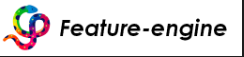

- https://feature-engine.readthedocs.io/en/latest/

- **Note** : Feature-engine is a Python library for automated feature engineering, it aims to make the process more efficient and less time-consuming by providing a collection of transformers for common tasks such as missing data imputation, categorical variable encoding, and feature scaling. Built on top of scikit-learn, it provides a consistent and flexible API to easily customize and configure feature engineering steps to improve the performance of machine learning models.

In [ ]:
!pip install feature_engine # installing the feature_engine using pip install 

clear_output() # clearing the install process logs

In [ ]:
# lets select the numerical columns 

num_cols = X_train.select_dtypes(include = np.number).columns

num_cols

Index(['amt', 'city_pop', 'trans_hour', 'trans_month', 'timedelta_last_trans',
       'cust_age', 'lat_dist_cust_merch', 'long_dist_cust_merch',
       'lat_dist_prev_merch', 'long_dist_prev_merch'],
      dtype='object')

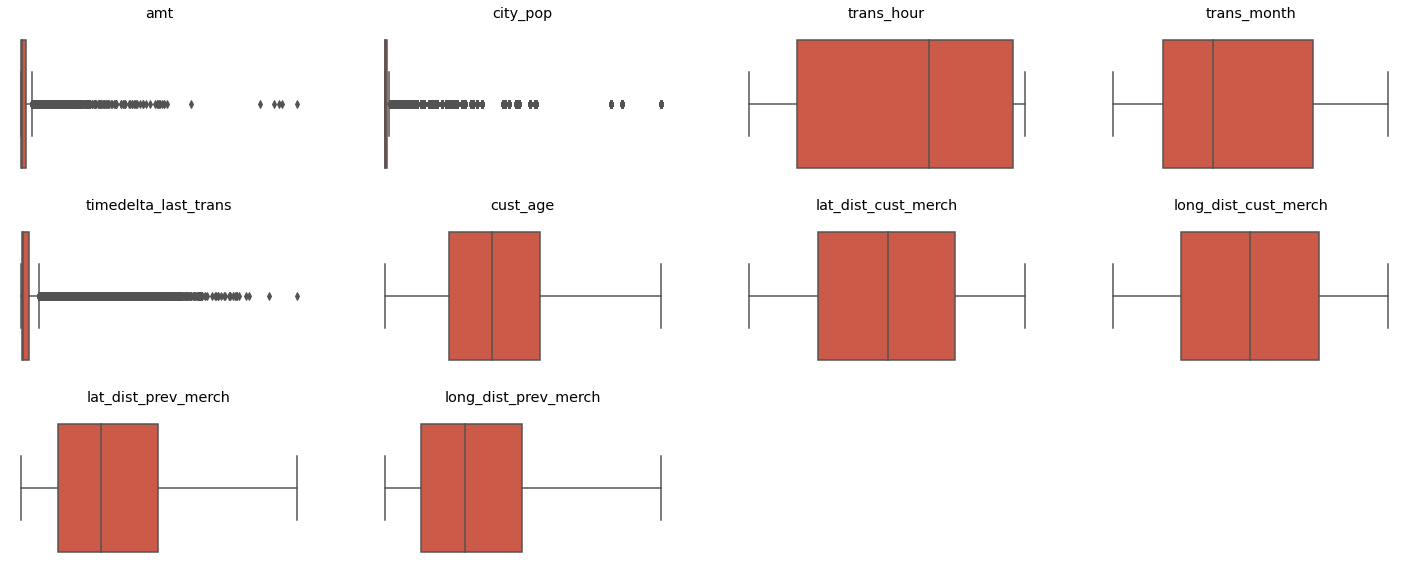

In [ ]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

**Inference :**

The the following variables has outliers in it.
  
  1. `amt`
  2. `city_pop`
  3. `timedelta_last_trans`

some of the classfiers may migh be affected by the outliers.
hence we need to handle them properly.

lets cap the variable at the Inter-quantile-range

1. IQR = 75th Quantile - 25th Quantile
2. Outliers (Right) = 75th Quantile + 1.5* IQR
3. Outliesr (Left) = 25th Quantile - 1.5 * IQR


> Importing the Winsorizer Class from feature engine for outlier handling

In [ ]:
from feature_engine.outliers import Winsorizer

> Instentiating the capper object

In [ ]:
variables = ['amt', 'city_pop', 'timedelta_last_trans'] # variables to be handled with the outlier

capper_iqr = Winsorizer(capping_method = 'iqr',tail = 'both', fold = 1.5, variables = variables) # choosing the IQR method with fold = 1.5 time of IQR

> Fitting the capper object in the symmetric train dataset, to learn the parameters

In [ ]:
capper_iqr.fit(train_symmetric_X)

Winsorizer(capping_method='iqr', fold=1.5, tail='both',
           variables=['amt', 'city_pop', 'timedelta_last_trans'])

In [ ]:
print('upper capping value : ',capper_iqr.right_tail_caps_) # print the leraned parameters - upper cap

print('lower capping value : ',capper_iqr.left_tail_caps_) # pring the learned parameters - lower cap

upper capping value :  {'amt': 1181.9925, 'city_pop': 50080.5, 'timedelta_last_trans': 1461.5}
lower capping value :  {'amt': -676.8275, 'city_pop': -28859.5, 'timedelta_last_trans': -806.5}


> Transforming self (train_symmetric), Real X_train, and Real X_test with the leaned parameter by the capper obeject

In [ ]:
train_symmetric_X = capper_iqr.transform(train_symmetric_X) # transforming symmetric X

X_train = capper_iqr.transform(X_train) # transforming the Real X with capper

X_test = capper_iqr.transform(X_test) # tranforming the test X

> Lets Look at all the distribution of the variables one more time

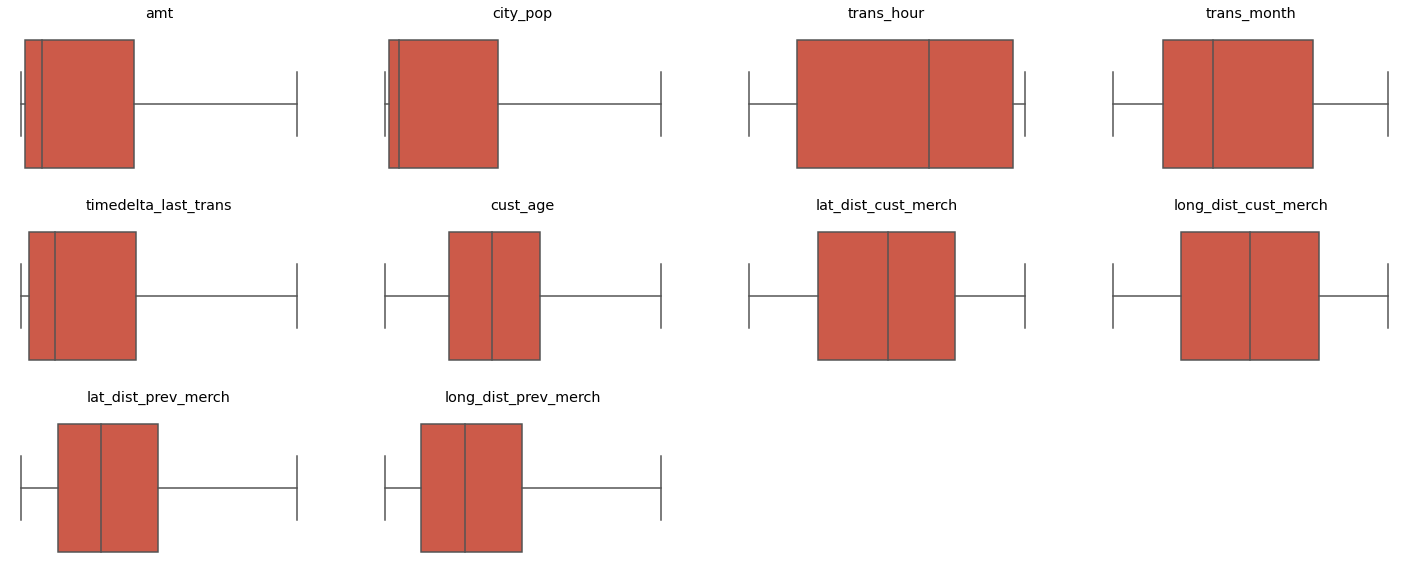

In [ ]:
plt.figure(figsize = [25,10])

for ind,col_name in enumerate(num_cols):
  plot_var = train_symmetric_X[col_name]
  plt.subplot(3,4,ind+1)
  sns.boxplot(plot_var)
  plt.title(col_name)
  plt.axis(False)

> Almost all variables look good in terms their distribution

> **7.3 Categorical Encoding Encoding**

> **Objective :** To convert non-numeric categorical variables into numerical values to be used by model building phase, allowing them to use categorical data and improve performance, it prevent the curse of dimensionality

> Steps

 - Check the cardinality of the variables
 - Choose the encoding type
 - Execute the encoding

> **7.3.A ) Check the Cardinality of the Categorical variables**

In [ ]:
cat_cols = X_train.select_dtypes(exclude = np.number).columns # choose the categorical variables

X_train[cat_cols].nunique().sort_values(ascending = False) # look at the cardinalitries of the categorical variables

state              51
category           14
trans_dayofweek     7
gender              2
dtype: int64

> **7.3.B ) Choosing Encoding Types**

> 1.OneHotEncoding** : `category` , `gender`

> 2.Target Guided Mean Encoding :** `state`,`trans_dayofweek`

> **7.3.C ) Execute the Encoding - OneHotEncoding**

> import the OneHotEncoder Class from the feature engine

In [ ]:
from feature_engine.encoding import OneHotEncoder

In [ ]:
variables = ['category','gender']

> Lets create the encoder instance 

In [ ]:
onehot_encod = OneHotEncoder(variables = variables, drop_last = True)

> Lets fit on the symmetric train data

In [ ]:
onehot_encod.fit(train_symmetric_X)

OneHotEncoder(drop_last=True, variables=['category', 'gender'])

> Transfrom self, Real X_train and real X_test

In [ ]:
train_symmetric_X = onehot_encod.transform(train_symmetric_X) # transform the symmetric X

X_train = onehot_encod.transform(X_train) # transform the real X

X_test = onehot_encod.transform(X_test) # transform test X

> **7.3.D ) Execute the Encoding - Target Guided Mean Encoding**

> Importing the MeanEncoder Class from feature_engine

In [ ]:
from feature_engine.encoding import MeanEncoder

In [ ]:
variables = ['state','trans_dayofweek']

> Creating the mean encoder instance

In [ ]:
mean_encod = MeanEncoder(variables = variables)

> Fitting the object on the symmetric X train

In [ ]:
mean_encod.fit(train_symmetric_X,train_symmetric_y)

MeanEncoder(variables=['state', 'trans_dayofweek'])

> Let look at the encoding dict 

In [ ]:
mean_encod.encoder_dict_

{'state': {'ak': 0.741951461119366,
  'al': 0.477028448297976,
  'ar': 0.47034978192080734,
  'az': 0.371199250102525,
  'ca': 0.4994729790084859,
  'co': 0.5875303352608083,
  'ct': 0.26287522777404815,
  'dc': 0.5032498962799059,
  'de': 1.0,
  'fl': 0.5302786857997673,
  'ga': 0.49176373691022474,
  'hi': 0.3180117584179583,
  'ia': 0.4764690967955844,
  'id': 0.2570814874479796,
  'il': 0.49863010504471106,
  'in': 0.469715125043485,
  'ks': 0.5395903886469924,
  'ky': 0.4857827650070814,
  'la': 0.4284853794765086,
  'ma': 0.4930383918273192,
  'md': 0.5068939393939393,
  'me': 0.5557664154421732,
  'mi': 0.47167727162894524,
  'mn': 0.5302160526041123,
  'mo': 0.46380411141514066,
  'ms': 0.4845913026463826,
  'mt': 0.31566349465818205,
  'nc': 0.4599881658926682,
  'nd': 0.4021836188002273,
  'ne': 0.5616788787983993,
  'nh': 0.5497178545992439,
  'nj': 0.45353300897201265,
  'nm': 0.45981271301412924,
  'nv': 0.5937454332894929,
  'ny': 0.5337388136888969,
  'oh': 0.54354963115

> Transforming the X_symmetric, Real_X and X_test

In [ ]:
train_symmetric_X = mean_encod.transform(train_symmetric_X) # transforming the symmetric X

X_train = mean_encod.transform(X_train) # Transforming the Real X Train

X_test = mean_encod.transform(X_test) # Transforming the X test

>>All the variables are now converted into numbers

In [ ]:
X_train.dtypes

amt                        float64
state                      float64
city_pop                   float64
trans_hour                   int64
trans_month                  int64
trans_dayofweek            float64
timedelta_last_trans       float64
cust_age                   float64
lat_dist_cust_merch        float64
long_dist_cust_merch       float64
lat_dist_prev_merch        float64
long_dist_prev_merch       float64
category_misc_net            int64
category_gas_transport       int64
category_kids_pets           int64
category_home                int64
category_shopping_net        int64
category_food_dining         int64
category_personal_care       int64
category_grocery_pos         int64
category_entertainment       int64
category_shopping_pos        int64
category_misc_pos            int64
category_travel              int64
category_health_fitness      int64
gender_f                     int64
dtype: object

> **7.4 Transforming the Highly Skewed Variables**

- look at the skewness of the variables
- list the variables having skewness more than 2.0 or lesser than -2.0
- lets look at the varibale minimum value to decide the which transformation can be choosen.
- Fit and tranform the transformer

> 7.4.A ) Look at the skewness of the variables

In [ ]:
X_train.skew()

amt                        5.716968
state                     -1.104014
city_pop                   1.191580
trans_hour                -0.282825
trans_month                0.298516
trans_dayofweek           -0.119918
timedelta_last_trans       1.100931
cust_age                   0.610874
lat_dist_cust_merch       -0.001202
long_dist_cust_merch      -0.001450
lat_dist_prev_merch        0.565637
long_dist_prev_merch       0.565088
category_misc_net          4.188097
category_gas_transport     2.638516
category_kids_pets         2.926938
category_home              2.763540
category_shopping_net      3.220984
category_food_dining       3.354589
category_personal_care     3.370824
category_grocery_pos       2.755556
category_entertainment     3.297053
category_shopping_pos      2.865788
category_misc_pos          3.652961
category_travel            5.389197
category_health_fitness    3.488526
gender_f                  -0.190655
dtype: float64

> 7.4.B ) list the variables having skewness more than 2.0 or lesser than -2.0

In [ ]:
skew = X_train.skew()
feature_high_skew = list(skew[(skew > 2) | (skew < -2)].index)
feature_high_skew

['amt',
 'category_misc_net',
 'category_gas_transport',
 'category_kids_pets',
 'category_home',
 'category_shopping_net',
 'category_food_dining',
 'category_personal_care',
 'category_grocery_pos',
 'category_entertainment',
 'category_shopping_pos',
 'category_misc_pos',
 'category_travel',
 'category_health_fitness']

In [ ]:
X_train.min()

amt                         1.000000
state                       0.257081
city_pop                   23.000000
trans_hour                  0.000000
trans_month                 1.000000
trans_dayofweek             0.445584
timedelta_last_trans        0.000000
cust_age                   13.000000
lat_dist_cust_merch         0.000000
long_dist_cust_merch        0.000000
lat_dist_prev_merch         0.000000
long_dist_prev_merch        0.000000
category_misc_net           0.000000
category_gas_transport      0.000000
category_kids_pets          0.000000
category_home               0.000000
category_shopping_net       0.000000
category_food_dining        0.000000
category_personal_care      0.000000
category_grocery_pos        0.000000
category_entertainment      0.000000
category_shopping_pos       0.000000
category_misc_pos           0.000000
category_travel             0.000000
category_health_fitness     0.000000
gender_f                    0.000000
dtype: float64

Note : Since we have zero or negative values in the dataset, We can try the following,

- Exponential Transformation
- Yoejohnson Transformation

> Import the YeoJohnsonTransformer from feature Engine

In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer

> Creating the transformer object

In [ ]:
yeojohnson_transformer = YeoJohnsonTransformer(variables = feature_high_skew)

> Fitting the symmetric X train

In [ ]:
yeojohnson_transformer.fit(train_symmetric_X)

YeoJohnsonTransformer(variables=['amt', 'category_misc_net',
                                 'category_gas_transport', 'category_kids_pets',
                                 'category_home', 'category_shopping_net',
                                 'category_food_dining',
                                 'category_personal_care',
                                 'category_grocery_pos',
                                 'category_entertainment',
                                 'category_shopping_pos', 'category_misc_pos',
                                 'category_travel', 'category_health_fitness'])

> Transform the dataset to the transformation object

In [ ]:
train_symmetric_X = yeojohnson_transformer.transform(train_symmetric_X) # transforming the symmetric X

X_train = yeojohnson_transformer.transform(X_train) # Transforming the Real X

X_test = yeojohnson_transformer.transform(X_test) # Transforming the X test

> **7.5 Feature Scalling**

- Lets use the min-max scaler (normalization) since the dataset is not in the risk of the outliers.

- **Note :** MinMaxScaler is a feature scaling method in scikit-learn which scales the data set so that all the features lie between 0 and 1, it helps to normalize the data and it's useful for algorithm that are sensitive to the scale of the input features 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler() # creating the scaler object

In [ ]:
scaler.fit(train_symmetric_X) # fit on the symmetric X to learn the parameter for the scaler

MinMaxScaler()

> Lets look at the min-max parameters for each variables

In [ ]:
scaler.data_max_

array([9.25448874e+00, 1.00000000e+00, 5.00805000e+04, 2.30000000e+01,
       1.20000000e+01, 5.50040921e-01, 1.46150000e+03, 9.50000000e+01,
       9.99999000e-01, 9.99997000e-01, 1.99967700e+00, 1.99622300e+00,
       5.90578781e-02, 6.37855605e-02, 4.13089333e-02, 4.21608834e-02,
       1.05876222e-01, 3.14391643e-02, 3.45399074e-02, 1.14483256e-01,
       3.60021014e-02, 7.01113139e-02, 3.28629131e-02, 1.62314432e-02,
       2.91868646e-02, 1.00000000e+00])

In [ ]:
scaler.data_min_

array([ 0.71092303,  0.25708149, 23.        ,  0.        ,  1.        ,
        0.44558351,  0.        , 13.        ,  0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        ])

> Lets transfor the dataframes to the minmax scaler

In [ ]:
train_symmetric_X = pd.DataFrame(data = scaler.transform(train_symmetric_X), columns = train_symmetric_X.columns) # transform the X_symmetric

X_train = pd.DataFrame(data = scaler.transform(X_train), columns = X_train.columns) # transform the Real X

X_test = pd.DataFrame(data = scaler.transform(X_test), columns = X_test.columns) # transform the X test

> Lets look at the Train dataframe and after the transformation

In [ ]:
print('number of arrived columns : ', len(X_train.columns))

X_train.agg(func =[np.min,np.max,np.mean, np.std], axis = 0).transpose().round(2)

number of arrived columns :  26


,amin,amax,mean,std
amt,0.0,1.0,0.40,0.19
state,0.0,1.0,0.32,0.07
city_pop,0.0,1.0,0.27,0.39
trans_hour,0.0,1.0,0.56,0.30
trans_month,0.0,1.0,0.47,0.31
trans_dayofweek,0.0,1.0,0.49,0.38
timedelta_last_trans,0.0,1.0,0.31,0.31
cust_age,0.0,1.0,0.40,0.21
lat_dist_cust_merch,0.0,1.0,0.50,0.29
long_dist_cust_merch,0.0,1.0,0.50,0.29


### 8.Resampling for Modeling

**Context :**

- Now we've got a better set of data to be trained on, in terms of data type and value consistency
- On the otherside the dataset still is huge for modeling in term of experimenting and tuning different models
- And the target label is still highly imbalanced ~ 99.5 % : 0.5 %
- Minority class need to have enough representation so that the model is not biased, hence the minority class need to be over sampled
- Majority class must be repeatative in the terms of a common pottern across the dataset, hence that can be under sampled

**Strategy :**

- Create training samples through hybrid resampling methods
- Create two difftent trainig samples
- 1 For Training the models
- Another one for a much smaller version for hyperparameter tuning
- Use `imblearn - make_pipeline class` for resampling pipeline
- Majority and Minority class must be equally contributing to both sub-samples
- The best of the model shall be re-trained on the balance sample on its entirety

> Lets check the original train set status

In [ ]:
print(X_train.shape, y_train.shape,'\n')
print(y_train.value_counts(normalize = True)*100)

(1296675, 26) (1296675,) 

0    99.421135
1     0.578865
Name: is_fraud, dtype: float64


> Import SMOTE, RandomUnderSampler & make_pipeline Classes from the imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import make_pipeline

> Create a control legth for each Class

*total legth of the resulting sample = control_length x 2*

In [ ]:
ini_records = sum(y_train == 0) # get to the number record representing the majority class

control_len = ini_records//3 # arriving the control length

control_len # display the control lengh ( expected numeber of each class in the resulting dataset )

429723

> Make pipeline for making the sample for Training

In [ ]:
resample_pipeline_learning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # oversampling of the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

> Create the training sample using the above defined pipeline

In [ ]:
X_resampled, y_resampled = resample_pipeline_learning.fit_resample(X_train,y_train)

[Pipeline] ............. (step 1 of 2) Processing smote, total=   2.4s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   1.8s


> Lets confirm the class distribution

In [ ]:
print(X_resampled.shape, y_resampled.shape,'\n')
print(y_resampled.value_counts(normalize = True)*100)

(859446, 26) (859446,) 

0    50.0
1    50.0
Name: is_fraud, dtype: float64


> Lets create sample for hyperparameter tuning purpose

In [ ]:
control_len = 100000 # limiting the length of each class into much reduced size

resample_pipeline_hp_tuning = make_pipeline(SMOTE(sampling_strategy = {1:control_len}, n_jobs = -1, random_state = 42), # over sampling the minority class
                                  RandomUnderSampler(sampling_strategy = {0:control_len},random_state = 42), # undersampling the majority class
                                  verbose = 1)

X_hp_tuning, y_hp_tuning = resample_pipeline_hp_tuning.fit_resample(X_train,y_train) # resampling with the pipeline

[Pipeline] ............. (step 1 of 2) Processing smote, total=   2.1s
[Pipeline]  (step 2 of 2) Processing randomundersampler, total=   0.6s


> Lets confirm the distribution of the class in the hyperparamter tuning class

In [ ]:
print(X_hp_tuning.shape, y_hp_tuning.shape,'\n')
print(y_hp_tuning.value_counts(normalize = True)*100)

(200000, 26) (200000,) 

0    50.0
1    50.0
Name: is_fraud, dtype: float64


### Delete the Redundant Objects to Freeup the Memory

In [ ]:
variable_remove = ['train_data','test_data','drop_cols2','stats_by_class','stats_by_var','normalize_count_by_class','trans_hour_distribution','majority_count','resample',
                   'train_majority','train_minority','minority_resampled','train_symmetric','train_symmetric_X','train_symmetric_y','num_cols','col_name','Winsorizer',
                   'OneHotEncoder','MeanEncoder','skew','feature_high_skew','YeoJohnsonTransformer','MinMaxScaler','SMOTE','RandomUnderSampler','make_pipeline','ini_records']

In [ ]:
# deleting the redundant variables from the memory

for rem in variable_remove:
  try:
    del vars()[rem]
  except:
    pass

### 9.Building Machine Learning Models

- 9.1 Assumptions
- 9.2 Selction of Algorithms
- 9.3 Selection of Evaluation Matric
- 9.4 Define functions for supporting model building and evaluation
- 9.5 Model Building
- 9.6 Buid Hybrid Model from best performing models to have balance with other metric
- 9.7 Finalising the best Model

> **9.1 Assumption**
- Dataset does not looks like linearly separable,hence the linear model like logistic regression may not perform well in the give dataset.
- Tree Models and ensembles could be the go to model in the given context


> **9.2 Go to Algorithms**.

  > - `Decision Tree`
  > - `Random Forest`
  > - `XG Boost`

> Note : Algorithms can be trained on the training samples with normal hyperparamters and Search Algorithms can be used to find the better hyperpatamers by training them on the tuning samples created above

> **9.2.A ) Search Algorithms**

- Easily implementable algorthms are GridseacchCV,RandomSearchCV,HalvingRandomSearchCV, BayesianSearchCV fron hyperopt.

- Considering the number models and the size of the datset, we choose the following 

  -- `HalvingRandomSearchCV` - Much faster than GridSearchCV & RandomizedSearchCV - Get to hyperparametr through successive halving

  -- `BayesianSearchCV` - Gaussion Process Search - picking the parameters from its distributions (suitable XG boost where we have hyperparameters of continues nature)

> Reference Link : https://scikit-learn.org/stable/auto_examples/model_selection/plot_successive_halving_heatmap.html#sphx-glr-auto-examples-model-selection-plot-successive-halving-heatmap-py

> **9.3 Best Evaluation Metric**

> - `Emphasizing true-positive` - for predicting the frauds effectively
> - `Emphasizing true-negatives` - for the seeamless user experice of the bank
> - Hense, we can choose the `roc_auc` as the best metric in our business context,
> - same time we may look at the precision and recall to finalize the best model

> **9.4 Defining Function to Train Model & Evaluate**

  > - Function to print confusion Matrix - which is more informtive and Readable
  > - Function to return the train and test performance of a model

> Function to print pretty confusion matrix

In [ ]:
import itertools

from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=12): 
  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Greens) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

> Function to print the best performance of a model (A
t differnt threshold values ranging from 0.1 to 0.9)

In [ ]:
# Create a function for evaluating the model performance

from sklearn.metrics import roc_auc_score,precision_score,recall_score, f1_score

def evaluate_model(model,model_id,model_spec,X_train,y_train,y_true = y_test, X_test = X_test):

  eval_table = pd.DataFrame()
  
  for thresh in np.arange(0.1,1,0.1):

    y_pred_train = (model.predict_proba(X_train)[:,1] > thresh).astype(np.int)
    y_pred_test = (model.predict_proba(X_test)[:,1] > thresh).astype(np.int)
    
    roc_auc_train = round(roc_auc_score(y_train,y_pred_train)*100,2)
    precision_train = round(precision_score(y_train,y_pred_train)*100,2)
    recall_train = round(recall_score(y_train,y_pred_train)*100,2)
    f1_train = round(f1_score(y_train,y_pred_train)*100,2)

    roc_auc_test = round(roc_auc_score(y_true,y_pred_test)*100,2)
    precision_test = round(precision_score(y_true,y_pred_test)*100,2)
    recall_test = round(recall_score(y_true,y_pred_test)*100,2)
    f1_test = round(f1_score(y_true,y_pred_test)*100,2)

    eval_dict = {'model_id':[model_id,model_id],'validation on':['Train','Test'],'threshold' : [thresh,thresh],'roc_auc' : [roc_auc_train,roc_auc_test],
                'precision' : [precision_train, precision_test], 'recall' : [recall_train,recall_test],
                'f1_score':[f1_train,f1_test],'desc':[model_spec,model_spec]}
    
    eval_table_iter = pd.DataFrame(eval_dict)

    eval_table = pd.concat([eval_table, eval_table_iter], axis = 0)

  eval_table['sort_weight'] = eval_table[['roc_auc','precision','recall']].sum( axis = 1)
  eval_table.sort_values(by = ['validation on','sort_weight'], ascending = [True,False], inplace = True)
  eval_table.reset_index(inplace = True, drop = True)

  test = eval_table[eval_table['validation on'] == 'Test']
  test.reset_index(inplace = True, drop = True)
  
  best_threshold = test.iloc[0]['threshold']
  
  best_eval = eval_table[eval_table['threshold'] == best_threshold]
  
  best_eval.sort_values(by = 'validation on', ascending = False, inplace = True)

  y_pred_test_best_threshold = (model.predict_proba(X_test)[:,1] > best_threshold).astype(np.int)  

  make_confusion_matrix(y_true = y_true,y_pred = y_pred_test_best_threshold, classes = ['Genuine','Fraud']) 

  result = {'all':eval_table, 'best':best_eval,'all_test': test}

  return result # return a dictionary, by using the key : 'all','best','all_test', we may access the relevent content

> **9.5 Model Building**

> Importing the relevant Algorithms

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

> **Model 1 : Decision Tree**

- *Normal Hyperparameters*

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
14,model_1,Train,0.6,99.09,100.00,98.18,99.08,Decision Tree | Normal H-Params,297.27
0,model_1,Test,0.6,91.19,43.27,82.80,56.84,Decision Tree | Normal H-Params,217.26


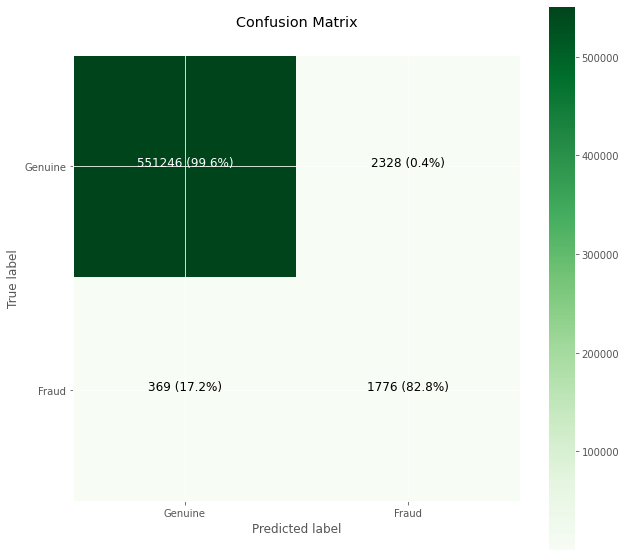

In [ ]:
model_1 = DecisionTreeClassifier(max_depth = 30, min_samples_split= 30, random_state=42,class_weight = {0:20,1:1}) # creating the model object

model_1_spec = 'Decision Tree | Normal H-Params'

model_1.fit(X_resampled,y_resampled) # fitting the model with train_sample

model_1_eval = evaluate_model(model_1,'model_1',model_1_spec,X_resampled, y_resampled) # calling the evaluate model function

model_1_eval['best'] # printing the best results

**Inference :** Model is overfitting. And the precison is very less

> **Model 2 : Decision Tree | HyperParameter Tuning**

- *Optimized Hyperparameters*

Choosing the best model of Decision Tree for Hyperparameter Optimization (based on the performance on the test dataset)

Model trained on the SMOTE Sample is performing better and can be modified for by optimizing the hyperparameters thoough cross validation with help of Randomised Search CV

> Importing the labraries and classes for Cross Validation Search

- Cross Validation - `StratifiedKFoldCrossValidation` Scheme
- Search Algorith - `HalvingRandomSearchCV`

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn import metrics

> Defining the Search Space and cross validation scheme

In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # creating the stratified K fold cross validation

model_2_spec = 'Decision Tree | Optimized H-Params'

model_2 = DecisionTreeClassifier(random_state = 42, class_weight = {0:20,1:1}) # creating the model object

# defining the hyperparameter space

param_grid = {'max_depth': [10,20,30],  
              'min_samples_split': [10,20,30,50],
              'min_samples_leaf': [5,10,20,50,100],
              }

> Training the hyper parameter space with hyperparameter-tuning dataset - In Halving Randomised Search

In [ ]:
%%time

# definnig the halving random search object

halving_search_dt = HalvingRandomSearchCV(estimator = model_2,
                                      param_distributions = param_grid,
                                      cv = skf,
                                      scoring = 'roc_auc',
                                      refit = True,
                                      n_jobs = -1,
                                      random_state = 42)

halving_search_dt.fit(X_hp_tuning,y_hp_tuning) # fitting

CPU times: user 4.46 s, sys: 390 ms, total: 4.85 s
Wall time: 13.5 s


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=DecisionTreeClassifier(class_weight={0: 20,
                                                                     1: 1},
                                                       random_state=42),
                      n_jobs=-1,
                      param_distributions={'max_depth': [10, 20, 30],
                                           'min_samples_leaf': [5, 10, 20, 50,
                                                                100],
                                           'min_samples_split': [10, 20, 30,
                                                                 50]},
                      random_state=42, scoring='roc_auc')

> Accessing the best parameters

In [ ]:
best_params = halving_search_dt.best_params_
best_params

{'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 20}

> Lets Build model with training sample - by resetting into the best hyperparemeters

CPU times: user 36.3 s, sys: 72.8 ms, total: 36.4 s
Wall time: 36.3 s


,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
17,model_2,Train,0.9,99.15,100.00,98.31,99.15,Decision Tree | Optimized H-Params,297.46
0,model_2,Test,0.9,91.54,43.24,83.50,56.97,Decision Tree | Optimized H-Params,218.28


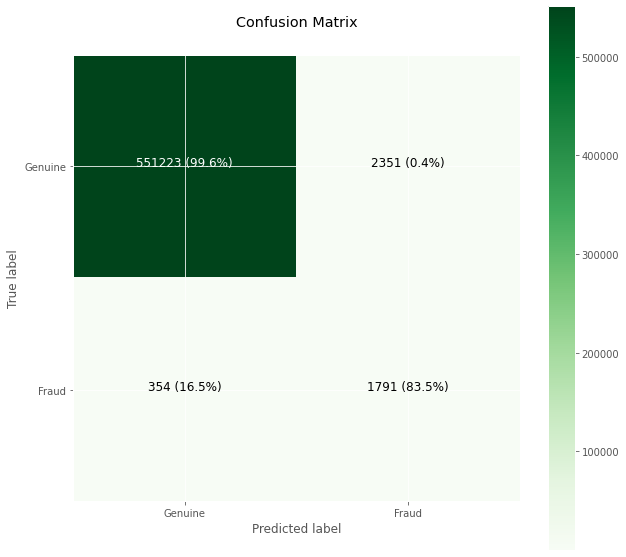

In [ ]:
%%time

model_2.set_params(**best_params) # assignig the best parmeters

model_2.fit(X_resampled,y_resampled) # making the model learn from the training sample

model_2_eval = evaluate_model(model_2,'model_2',model_2_spec,X_resampled, y_resampled) # evaluating the model using the funstion call

model_2_eval['best'] # print the best result

**Inference :** Model 2 is slightly better from model 1. but still continue the the short coming of the model 1

> **Model 3 : RandomForestClassifier**

- *Normal Hyperparameters*

CPU times: user 4min 40s, sys: 433 ms, total: 4min 40s
Wall time: 2min 32s


,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
14,model_3,Train,0.6,86.92,99.97,73.87,84.96,Ransom Forest | Normal H-Params,260.76
0,model_3,Test,0.6,82.50,89.19,65.03,75.22,Ransom Forest | Normal H-Params,236.72


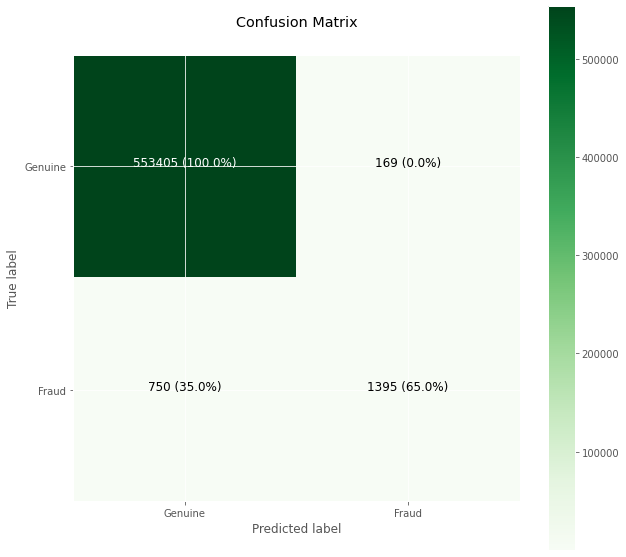

In [ ]:
%%time

model_3 = RandomForestClassifier(n_estimators = 50, max_depth = 10, min_samples_split= 50, random_state=42, n_jobs = -1, class_weight = {0:20,1:1}) # creating the object

model_3_spec = 'Ransom Forest | Normal H-Params'

model_3.fit(X_resampled,y_resampled) # fitting on the trainig set

model_3_eval = evaluate_model(model_3,'model_3',model_3_spec,X_resampled, y_resampled) # evaluating the model by the function call

model_3_eval['best'] # printing the best results

**Inference :**

Model is overfitting . precison being is very low, being a major concern

> **Model 4 : RandomForestClassifier | Hyperparameter Tuning**

- *Optimized Hyperparameters*

> Defining the Hyperparameter space & Cross Valiadtion Scheme

In [ ]:
model_4_spec = 'Random Forest | Optimized H-Params'

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # cross validation scheme

model_4 = RandomForestClassifier(random_state=42, class_weight = {0:20,1:1}) # model object

# hyperparamer space

param_grid = {
    'n_estimators' : [100,200,300,500],
    'max_depth': [5,10,20],
    'min_samples_split': [10,20,30],
    'min_samples_leaf': [10,20,30,50],
    'max_features': ['sqrt', 'log2']
    }

> Defing the search Object & Fitting on the hyperparameter-tuning-sample

In [ ]:
%%time

halving_search_rfc = HalvingRandomSearchCV(estimator = model_4,
                                      param_distributions = param_grid,
                                      cv = skf,
                                      scoring = 'roc_auc',
                                      refit = True,
                                      n_jobs = -1,
                                      random_state = 42)

halving_search_rfc.fit(X_hp_tuning,y_hp_tuning) # fitting 

CPU times: user 3min 31s, sys: 1.04 s, total: 3min 32s
Wall time: 15min 11s


HalvingRandomSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                      estimator=RandomForestClassifier(class_weight={0: 20,
                                                                     1: 1},
                                                       random_state=42),
                      n_jobs=-1,
                      param_distributions={'max_depth': [5, 10, 20],
                                           'max_features': ['sqrt', 'log2'],
                                           'min_samples_leaf': [10, 20, 30, 50],
                                           'min_samples_split': [10, 20, 30],
                                           'n_estimators': [100, 200, 300,
                                                            500]},
                      random_state=42, scoring='roc_auc')

> Accessing the best hyperparameters

In [ ]:
best_params = halving_search_rfc.best_params_
best_params

{'n_estimators': 500,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'sqrt',
 'max_depth': 10}

> Lets Build model with training sample - by resetting into the best hyperparemeters

CPU times: user 31min 21s, sys: 1.96 s, total: 31min 23s
Wall time: 31min 16s


,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
14,model_4,Train,0.6,86.79,99.98,73.60,84.78,Random Forest | Optimized H-Params,260.37
0,model_4,Test,0.6,81.99,90.75,64.01,75.07,Random Forest | Optimized H-Params,236.75


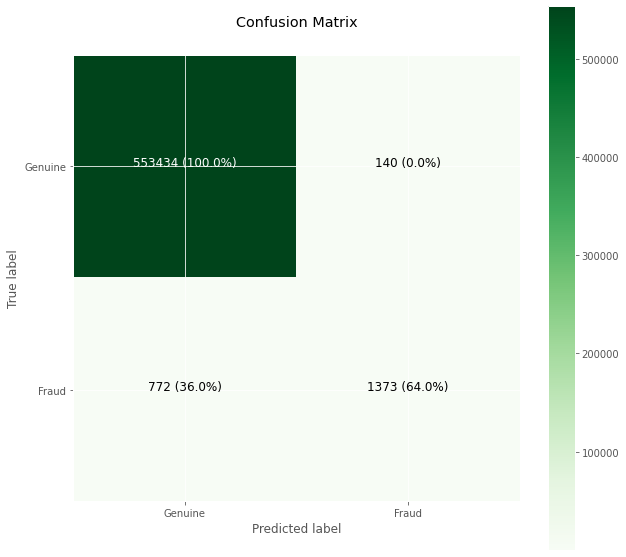

In [ ]:
%%time

model_4.set_params(**best_params) # assigning best parameters to the model

model_4.fit(X_resampled,y_resampled) # fitting on the training sample

model_4_eval = evaluate_model(model_4,'model_4',model_4_spec,X_resampled, y_resampled) # evaluating the model

model_4_eval['best'] # printing the best results

**Inference :**

> **Model 5 : XgBoost**

- *Normal Hyperparameters*

CPU times: user 14min 1s, sys: 1.04 s, total: 14min 2s
Wall time: 7min 20s


,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
15,model_5,Train,0.8,91.83,99.89,83.76,91.12,XGBoost | Normal H-Params,275.48
0,model_5,Test,0.8,87.04,75.19,74.17,74.68,XGBoost | Normal H-Params,236.40


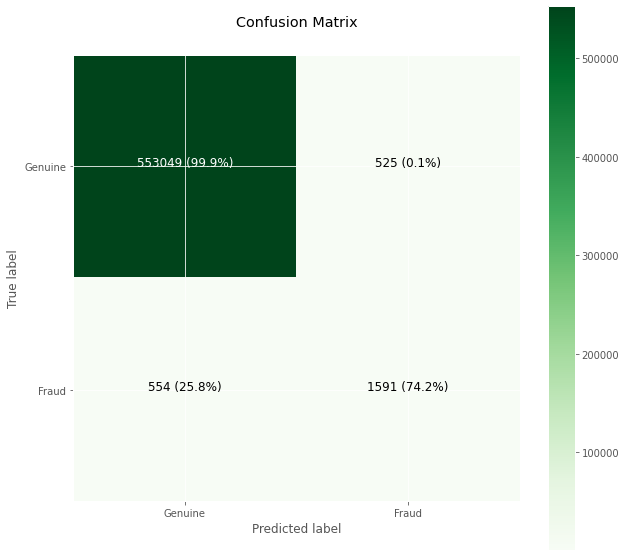

In [ ]:
%%time
model_5 = XGBClassifier(n_estimators = 100,
                        max_depth = 10,
                        learning_rate = 0.01,
                        min_samples_splits =30,
                        loss = 'deviance',
                        n_jobs = -1,
                        random_state = 42,class_weight = {0:20,1:1}) # create the object

model_5_spec = 'XGBoost | Normal H-Params'

model_5.fit(X_resampled,y_resampled) # fitting the training sample

model_5_eval = evaluate_model(model_5,'model_5',model_5_spec,X_resampled, y_resampled) # evaluating the model

model_5_eval['best'] # printing the best result

**Inference :** In terms of the roc_auc and recall, the model has improved by a big mark and does not overfitting in that aspect, but on the other side the precison being the real concern for the model ~ 11.5, which is very low.

> **Model 6 : XGBoost | Hyperparameter optimization**

- *Optimized hyperperameters*

- **Note :** For xgboost, there many hyperparameters which are continues in nature, let us use the bayesian search CV 

- Reference Link : https://scikit-optimize.github.io/stable/modules/generated/skopt.BayesSearchCV.html

> Lets install scikit optimize using pip

In [ ]:
!pip install scikit-optimize
clear_output()

> Import the Bayesian SearchCV from scikit optimize

In [ ]:
from skopt import BayesSearchCV

> Lets define the hyperparameter space

In [ ]:
# For Bayesian search, the parameter space consist of range of hyperparamters

params_grid = {'n_estimators' : (50,300,'uniform'),
                'max_depth' : (4,10,'uniform'),
               'learning_rate' : (0.001,3.0,'log-uniform'),
               'min_samples_splits' : (0.001,0.999,'log-uniform'),
               'subsample': (0.5,1.0,'log-uniform'),
               'colsample_bytree':  (0.4,1.0,'log-uniform'),
               'colsample_bylevel':  (0.4,1.0,'log-uniform'),
               'loss' : ['exponential','deviance'],
               'reg_lambda': (0.1,100.0,'log-uniform'),
               'gamma': (0.25,1.0,'log-uniform'),
               'lambda' :(0.1,100.0,'log-uniform')
               }

In [ ]:
%%time

model_6 = XGBClassifier(random_state = 42, class_weight = {0:20,1:1}) # creating the object

model_6_spec = 'XGBoost | Opmtimize H-Params - Bayesian Search'

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42) # defining the cross validation scheme

search = BayesSearchCV(estimator = model_6,
                       search_spaces = params_grid,
                       optimizer_kwargs= {'base_estimator': 'GP'}, # Gaussian Process
                       n_iter = 10,
                       scoring = 'precision',
                       n_jobs = -1,
                       verbose = 1,
                       random_state = 42
                       )


search.fit(X_hp_tuning,y_hp_tuning) # fitting the search object with hyper-parameter-tuning-sample

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
CPU times: user 2min 12s, sys: 2.81 s, total: 2min 15s
Wall time: 43min 27s


BayesSearchCV(estimator=XGBClassifier(class_weight={0: 20, 1: 1},
                                      random_state=42),
              n_iter=10, n_jobs=-1, optimizer_kwargs={'base_estimator': 'GP'},
              random_state=42, scoring='precision',
              search_spaces={'colsample_bylevel': (0.4, 1.0, 'log-uniform'),
                             'colsample_bytree': (0.4, 1.0, 'log-uniform'),
                             'gamma': (0.25, 1.0, 'log-uniform'),
                             'lambda': (0.1, 100.0, 'log-uniform'),
                             'learning_rate': (0.001, 3.0, 'log-uniform'),
                             'loss': ['exponential', 'deviance'],
                             'max_depth': (4, 10, 'uniform'),
                             'min_samples_splits': (0.001, 0.999,
                                                    'log-uniform'),
                             'n_estimators': (50, 300, 'uniform'),
                             'reg_lambda': (0.1, 100.0, 

> Lets access the best hyperparameters

In [ ]:
best_params = search.best_params_
best_params

OrderedDict([('colsample_bylevel', 0.8420635292835258),
             ('colsample_bytree', 0.46822496079668025),
             ('gamma', 0.5727963303428384),
             ('lambda', 25.603205585229382),
             ('learning_rate', 0.06587435368095368),
             ('loss', 'deviance'),
             ('max_depth', 9),
             ('min_samples_splits', 0.4144879333104471),
             ('n_estimators', 278),
             ('reg_lambda', 1.4467243548751343),
             ('subsample', 0.6335787009130003)])

> Lets Build model with training sample - by resetting into the best hyperparemeters

CPU times: user 16min 5s, sys: 996 ms, total: 16min 6s
Wall time: 16min 12s


,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
11,model_6,Train,0.6,99.91,99.97,99.84,99.91,XGBoost | Opmtimize H-Params - Bayesian Search,299.72
0,model_6,Test,0.6,90.42,86.19,80.89,83.45,XGBoost | Opmtimize H-Params - Bayesian Search,257.50


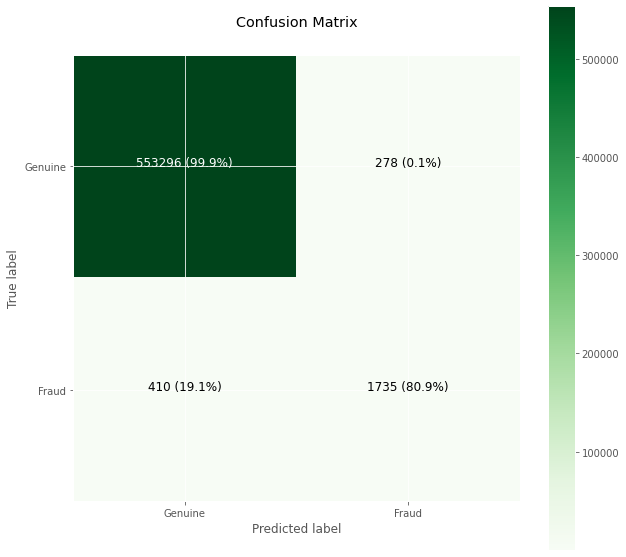

In [ ]:
%%time

model_6.set_params(**best_params) # assigning the best parameters to the model

model_6.fit(X_resampled, y_resampled) # fitting on the train_sample

model_6_eval = evaluate_model(model_6,'model_6',model_6_spec,X_resampled, y_resampled) # evaluating the model

model_6_eval['best'] # printing the best result

**Inference :**

> Compiling the results of all the above models for all threshold values

In [ ]:
eval_list = [model_1_eval['all_test'],model_2_eval['all_test'],model_3_eval['all_test'],model_4_eval['all_test'],model_5_eval['all_test'],model_6_eval['all_test']]

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['roc_auc','recall','precision']].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
final_eval_table.head(10)

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
0,model_6,Test,0.6,90.42,86.19,80.89,83.45,XGBoost | Opmtimize H-Params - Bayesian Search,257.50
1,model_6,Test,0.7,88.91,90.27,77.86,83.60,XGBoost | Opmtimize H-Params - Bayesian Search,257.04
2,model_6,Test,0.5,91.96,79.66,84.01,81.78,XGBoost | Opmtimize H-Params - Bayesian Search,255.63
3,model_6,Test,0.8,87.19,93.83,74.41,83.00,XGBoost | Opmtimize H-Params - Bayesian Search,255.43
4,model_6,Test,0.4,93.10,70.71,86.34,77.75,XGBoost | Opmtimize H-Params - Bayesian Search,250.15
5,model_6,Test,0.9,83.89,96.87,67.79,79.76,XGBoost | Opmtimize H-Params - Bayesian Search,248.55
6,model_6,Test,0.3,94.43,60.61,89.09,72.14,XGBoost | Opmtimize H-Params - Bayesian Search,244.13
0,model_4,Test,0.6,81.99,90.75,64.01,75.07,Random Forest | Optimized H-Params,236.75
0,model_3,Test,0.6,82.50,89.19,65.03,75.22,Ransom Forest | Normal H-Params,236.72
0,model_5,Test,0.8,87.04,75.19,74.17,74.68,XGBoost | Normal H-Params,236.40


**Inference :**

This is very clear that `model 6 being the pick of the models` in terms of generalisation.

> **Lets train the model in X_train in the entirelty without downsampleing**

> **Model 7 | Pick of the Model on Entire Train Data**

- XGBoost is the pick of the models

- *Hyperparameter arrived in model 6 with bayesian search CV*

- *Training on SMOTE Sample , without downsampling the the majority class*

- Create a SMOTE Sample without without downsampling the majority class

> Check the shape of the Orginal Train sample before sampling balance

In [ ]:
print(X_train.shape,y_train.shape,'\n')

print(y_train.value_counts(normalize = True))

(1296675, 26) (1296675,) 

0    0.994211
1    0.005789
Name: is_fraud, dtype: float64


> Import the SMOTE class from the imblearn and create a smote object

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

In [ ]:
X_train_full, y_train_full = smote.fit_resample(X_train,y_train)

In [ ]:
print(X_train_full.shape,y_train_full.shape,'\n')

print(y_train_full.value_counts(normalize = True))

(2578338, 26) (2578338,) 

0    0.5
1    0.5
Name: is_fraud, dtype: float64


> Train the model on smote Sample on entirety

CPU times: user 49min 52s, sys: 4.74 s, total: 49min 57s
Wall time: 49min 44s


,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
9,model_7,Train,0.5,99.95,99.96,99.94,99.95,XGBoost | Pick Model Train on All Data,299.85
0,model_7,Test,0.5,89.16,87.73,78.37,82.79,XGBoost | Pick Model Train on All Data,255.26


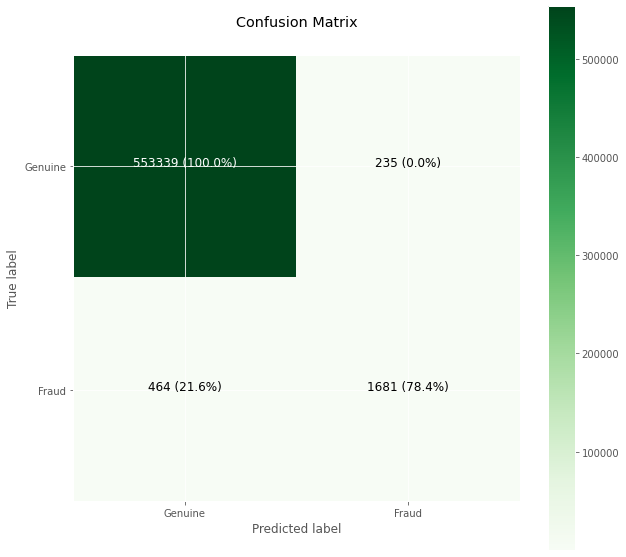

In [ ]:
%%time

model_7 = XGBClassifier(random_state = 42, class_weight = {0:20,1:1}) # Creating the object

model_7_spec = 'XGBoost | Pick Model Train on All Data'

model_7.set_params(**best_params) # Best hyperparameters from the model 6 arrived by bayesian search

model_7.fit(X_train_full, y_train_full) # Fitting on entire data with smote without downsampling

model_7_eval = evaluate_model(model_7,'model_7',model_7_spec,X_train_full, y_train_full) # evaluating the model

model_7_eval['best'] # printing the best result

> **Let look at the perforrmance in all threshold values**

In [ ]:
model_7_eval['all_test']

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
0,model_7,Test,0.5,89.16,87.73,78.37,82.79,XGBoost | Pick Model Train on All Data,255.26
1,model_7,Test,0.6,87.73,91.83,75.48,82.86,XGBoost | Pick Model Train on All Data,255.04
2,model_7,Test,0.7,86.26,94.65,72.54,82.13,XGBoost | Pick Model Train on All Data,253.45
3,model_7,Test,0.4,90.52,81.08,81.12,81.10,XGBoost | Pick Model Train on All Data,252.72
4,model_7,Test,0.8,83.82,96.35,67.65,79.49,XGBoost | Pick Model Train on All Data,247.82
5,model_7,Test,0.3,91.94,71.59,84.01,77.31,XGBoost | Pick Model Train on All Data,247.54
6,model_7,Test,0.2,93.82,57.95,87.88,69.84,XGBoost | Pick Model Train on All Data,239.65
7,model_7,Test,0.9,79.97,98.17,59.95,74.44,XGBoost | Pick Model Train on All Data,238.09
8,model_7,Test,0.1,95.75,38.63,92.07,54.43,XGBoost | Pick Model Train on All Data,226.45


> **Lets look the comparison of all models till model 7**

In [ ]:
eval_list = [model_1_eval['all_test'],model_2_eval['all_test'],model_3_eval['all_test'],model_4_eval['all_test'],model_5_eval['all_test'],model_6_eval['all_test'],model_7_eval['all_test']]

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['roc_auc','recall','precision']].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
final_eval_table.head(10)

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
0,model_6,Test,0.6,90.42,86.19,80.89,83.45,XGBoost | Opmtimize H-Params - Bayesian Search,257.50
1,model_6,Test,0.7,88.91,90.27,77.86,83.60,XGBoost | Opmtimize H-Params - Bayesian Search,257.04
2,model_6,Test,0.5,91.96,79.66,84.01,81.78,XGBoost | Opmtimize H-Params - Bayesian Search,255.63
3,model_6,Test,0.8,87.19,93.83,74.41,83.00,XGBoost | Opmtimize H-Params - Bayesian Search,255.43
0,model_7,Test,0.5,89.16,87.73,78.37,82.79,XGBoost | Pick Model Train on All Data,255.26
1,model_7,Test,0.6,87.73,91.83,75.48,82.86,XGBoost | Pick Model Train on All Data,255.04
2,model_7,Test,0.7,86.26,94.65,72.54,82.13,XGBoost | Pick Model Train on All Data,253.45
3,model_7,Test,0.4,90.52,81.08,81.12,81.10,XGBoost | Pick Model Train on All Data,252.72
4,model_6,Test,0.4,93.10,70.71,86.34,77.75,XGBoost | Opmtimize H-Params - Bayesian Search,250.15
5,model_6,Test,0.9,83.89,96.87,67.79,79.76,XGBoost | Opmtimize H-Params - Bayesian Search,248.55


**Inference :**

Still it looks like Model 6 wins the race. we can train the same model in ADASYN Sample in full.

> **Model 8 : Pick of Models | Pick Model Train on All Data - ADASYN Sample**

- create adasyn sample
- train the model

> Create adasyn sample

In [ ]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN() # create the adsyn object

X_train_full_adasyn, y_train_full_adasyn = adasyn.fit_resample(X_train,y_train) # create adasyn oversampling without down sampling

print(X_train_full_adasyn.shape,y_train_full_adasyn.shape,'\n')

print(y_train_full_adasyn.value_counts(normalize = True))

(2578430, 26) (2578430,) 

1    0.500018
0    0.499982
Name: is_fraud, dtype: float64


> Train the model on Adasyn Sample on entirety

CPU times: user 47min 3s, sys: 4.21 s, total: 47min 7s
Wall time: 46min 57s


,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
9,model_8,Train,0.5,99.95,99.95,99.95,99.95,XGBoost | Pick Model Train on All Data,299.85
0,model_8,Test,0.5,90.09,83.30,80.23,81.74,XGBoost | Pick Model Train on All Data,253.62


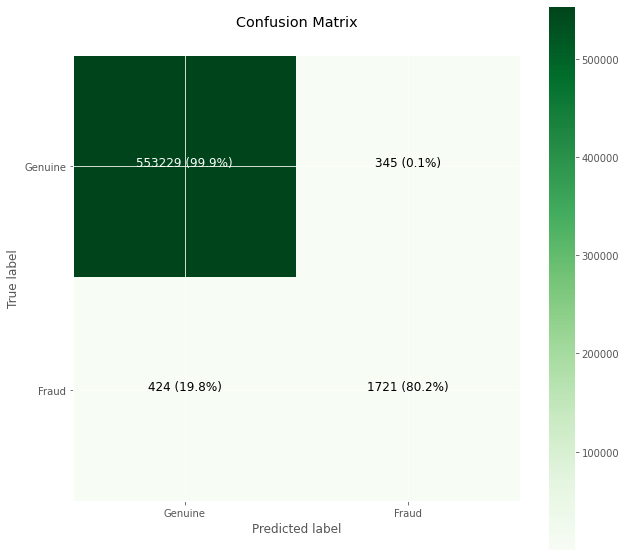

In [ ]:
%%time

model_8 = XGBClassifier(random_state = 42, class_weight = {0:20,1:1}) # Creating the object

model_8_spec = 'XGBoost | Pick Model Train on All Data'

model_8.set_params(**best_params) # Best hyperparameters from the model 6 arrived by bayesian search

model_8.fit(X_train_full_adasyn, y_train_full_adasyn) # Fitting on entire data with smote without downsampling

model_8_eval = evaluate_model(model_8,'model_8',model_8_spec,X_train_full_adasyn, y_train_full_adasyn) # evaluating the model

model_8_eval['best'] # printing the best result

> **Let look at all the threshold outcomes**

In [ ]:
model_8_eval['all_test']

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
0,model_8,Test,0.5,90.09,83.30,80.23,81.74,XGBoost | Pick Model Train on All Data,253.62
1,model_8,Test,0.6,88.21,88.12,76.46,81.88,XGBoost | Pick Model Train on All Data,252.79
2,model_8,Test,0.7,86.45,92.49,72.91,81.54,XGBoost | Pick Model Train on All Data,251.85
3,model_8,Test,0.4,91.76,74.97,83.64,79.07,XGBoost | Pick Model Train on All Data,250.37
4,model_8,Test,0.8,84.24,95.95,68.48,79.92,XGBoost | Pick Model Train on All Data,248.67
5,model_8,Test,0.3,93.52,64.74,87.23,74.32,XGBoost | Pick Model Train on All Data,245.49
6,model_8,Test,0.9,79.88,98.01,59.77,74.25,XGBoost | Pick Model Train on All Data,237.66
7,model_8,Test,0.2,94.90,52.58,90.12,66.41,XGBoost | Pick Model Train on All Data,237.60
8,model_8,Test,0.1,96.39,34.33,93.47,50.21,XGBoost | Pick Model Train on All Data,224.19


> **Lets look the comparison of all models till model 8**

In [ ]:
eval_list = [model_1_eval['all_test'],model_2_eval['all_test'],model_3_eval['all_test'],
             model_4_eval['all_test'],model_5_eval['all_test'],model_6_eval['all_test'],model_7_eval['all_test'],model_8_eval['all_test']]

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['roc_auc','recall','precision']].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
final_eval_table.head(10)

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
0,model_6,Test,0.6,90.42,86.19,80.89,83.45,XGBoost | Opmtimize H-Params - Bayesian Search,257.50
1,model_6,Test,0.7,88.91,90.27,77.86,83.60,XGBoost | Opmtimize H-Params - Bayesian Search,257.04
2,model_6,Test,0.5,91.96,79.66,84.01,81.78,XGBoost | Opmtimize H-Params - Bayesian Search,255.63
3,model_6,Test,0.8,87.19,93.83,74.41,83.00,XGBoost | Opmtimize H-Params - Bayesian Search,255.43
0,model_7,Test,0.5,89.16,87.73,78.37,82.79,XGBoost | Pick Model Train on All Data,255.26
1,model_7,Test,0.6,87.73,91.83,75.48,82.86,XGBoost | Pick Model Train on All Data,255.04
0,model_8,Test,0.5,90.09,83.30,80.23,81.74,XGBoost | Pick Model Train on All Data,253.62
2,model_7,Test,0.7,86.26,94.65,72.54,82.13,XGBoost | Pick Model Train on All Data,253.45
1,model_8,Test,0.6,88.21,88.12,76.46,81.88,XGBoost | Pick Model Train on All Data,252.79
3,model_7,Test,0.4,90.52,81.08,81.12,81.10,XGBoost | Pick Model Train on All Data,252.72


**Inference :**

It is very clear that, model6, mode8,model7 are the top model in terms of generalisation, 

-- **We can try a hybrid model (Ensemble chain model)**

> **Model 9 : Ensemble-Chain Model | Output : Logistic Regression**

- Create function to fit and evaluate the ensemble models
- define input models
- Define outmodel
- Call the initail function and Evaluate

> **Create a function to run the ensemble models**

In [ ]:
def hybrid_model_evaluate(input_estimators, output_estimator,model_id,model_spec,X_train,y_train,X_test = X_test, y_test = y_test):

  p1_train = input_estimators[0].predict_proba(X_train)[:,1].ravel() # model predicting the probability of the input model1 in the train dataset
  p2_train = input_estimators[1].predict_proba(X_train)[:,1].ravel() # predicting the probability of the input model2 in the train dataset
  p3_train = input_estimators[2].predict_proba(X_train)[:,1].ravel() # predicting the probability of the input model3 in the train dataset

  p1_test = input_estimators[0].predict_proba(X_test)[:,1].ravel() # predicting the probability of the input model1 in the test dataset
  p2_test = input_estimators[1].predict_proba(X_test)[:,1].ravel() # predicting the probability of the input model2 in the test dataset
  p3_test = input_estimators[2].predict_proba(X_test)[:,1].ravel() # predicting the probability of the input model3 in the test dataset

  X_ensemble_train = np.column_stack((p1_train, p2_train, p3_train)) # creating the features for the output model in the train set
  X_ensemble_test = np.column_stack((p1_test, p2_test, p3_test)) # creating the features for the output model in the train set

  output_estimator.fit(X_ensemble_train,y_train) # fitting on the training set

  pred_proba_train = output_estimator.predict_proba(X_ensemble_train)[:,1].ravel() # output model predicting the probability on the train set
  pred_proba_test = output_estimator.predict_proba(X_ensemble_test)[:,1].ravel() # output model predicting the probability on the test set

  eval_table = pd.DataFrame()
  
  for thresh in np.arange(0.1,1,0.1):

    y_pred_train_out = (pred_proba_train > thresh).astype(np.int)
    y_pred_test_out = (pred_proba_test > thresh).astype(np.int)
    
    roc_auc_train = round(roc_auc_score(y_train,y_pred_train_out)*100,2)
    precision_train = round(precision_score(y_train,y_pred_train_out)*100,2)
    recall_train = round(recall_score(y_train,y_pred_train_out)*100,2)
    f1_train = round(f1_score(y_train,y_pred_train_out)*100,2)

    roc_auc_test = round(roc_auc_score(y_test,y_pred_test_out)*100,2)
    precision_test = round(precision_score(y_test,y_pred_test_out)*100,2)
    recall_test = round(recall_score(y_test,y_pred_test_out)*100,2)
    f1_test = round(f1_score(y_test,y_pred_test_out)*100,2)

    eval_dict = {'model_id':[model_id,model_id],'validation on':['Train','Test'],'threshold' : [thresh,thresh],'roc_auc' : [roc_auc_train,roc_auc_test],
                'precision' : [precision_train, precision_test], 'recall' : [recall_train,recall_test],
                'f1_score':[f1_train,f1_test],'desc':[model_spec,model_spec]}
    
    eval_table_iter = pd.DataFrame(eval_dict)

    eval_table = pd.concat([eval_table, eval_table_iter], axis = 0)

  eval_table['sort_weight'] = eval_table[['roc_auc','precision','recall']].sum( axis = 1)
  eval_table.sort_values(by = ['validation on','sort_weight'], ascending = [True,False], inplace = True)
  eval_table.reset_index(inplace = True, drop = True)

  test = eval_table[eval_table['validation on'] == 'Test']
  test.reset_index(inplace = True, drop = True)
  
  best_threshold = test.iloc[0]['threshold']
  
  best_eval = eval_table[eval_table['threshold'] == best_threshold]
  
  best_eval.sort_values(by = 'validation on', ascending = False, inplace = True)

  y_pred_test_best_threshold = (output_estimator.predict_proba(X_ensemble_test)[:,1] > best_threshold).astype(np.int)  

  make_confusion_matrix(y_true = y_test,y_pred = y_pred_test_best_threshold, classes = ['Genuine','Fraud']) 

  result = {'all':eval_table, 'best':best_eval,'all_test': test}

  return result # return a dictionary, by using the key : 'all','best','all_test', we may access the relevent content


> Define the input and output Estimators & Evaluate the Model through the Function Call

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
16,model_9,Train,0.9,99.91,99.97,99.84,99.91,"Hybrid Model 1 | Model6,7,8 + Output : Logit",299.72
0,model_9,Test,0.9,90.49,85.62,81.03,83.26,"Hybrid Model 1 | Model6,7,8 + Output : Logit",257.14


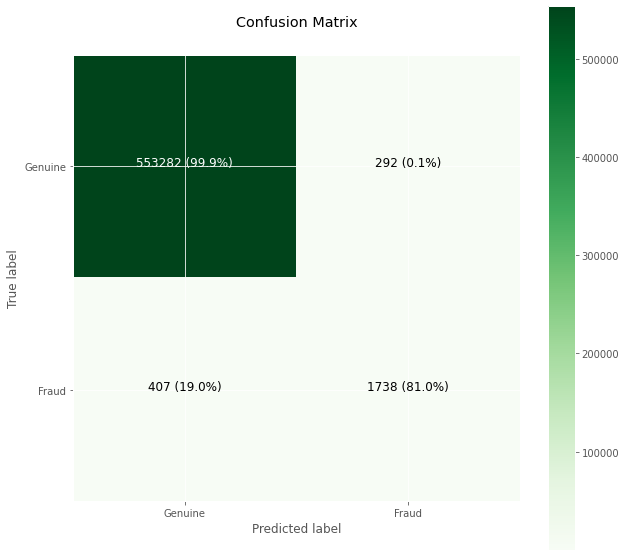

In [ ]:
from sklearn.linear_model import LogisticRegression

model_9_spec = 'Hybrid Model 1 | Model6,7,8 + Output : Logit'

input_estimators = [model_6,model_7,model_8]

output_estimator = LogisticRegression()

model_9_eval = hybrid_model_evaluate(input_estimators = input_estimators, output_estimator = output_estimator,
                                    model_id = 'model_9',model_spec = model_9_spec,X_train = X_resampled,y_train = y_resampled)

model_9_eval['best']

> **Model 10 : Ensemble-Chain Model | Output : Logistic Regression with L1**

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
16,model_10,Train,0.9,99.91,99.97,99.85,99.91,"Hybrid Model 2 | Model6,7,8 + Output : Logit w...",299.73
0,model_10,Test,0.9,90.93,84.35,81.91,83.11,"Hybrid Model 2 | Model6,7,8 + Output : Logit w...",257.19


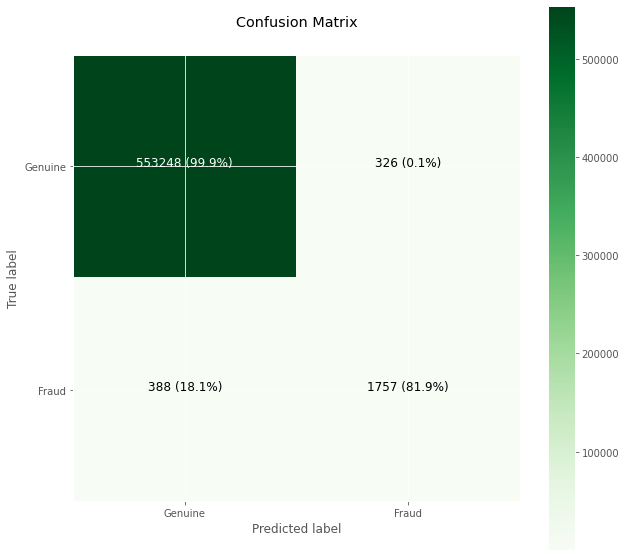

In [ ]:
from sklearn.linear_model import LogisticRegression

model_10_spec = 'Hybrid Model 2 | Model6,7,8 + Output : Logit with L1'

input_estimators = [model_6,model_7,model_8]

output_estimator = LogisticRegression(penalty="l1", C = 0.3,solver="saga")

model_10_eval = hybrid_model_evaluate(input_estimators = input_estimators, output_estimator = output_estimator,
                                    model_id = 'model_10',model_spec = model_10_spec,X_train = X_resampled,y_train = y_resampled)

model_10_eval['best']

> **Model 11 : Ensemble-Chain Model | Output : Logistic Regression with L2**

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
16,model_11,Train,0.9,99.90,99.98,99.83,99.90,"Hybrid Model 3 | Model6,7,8 + Output : Logit w...",299.71
0,model_11,Test,0.9,90.09,87.14,80.23,83.54,"Hybrid Model 3 | Model6,7,8 + Output : Logit w...",257.46


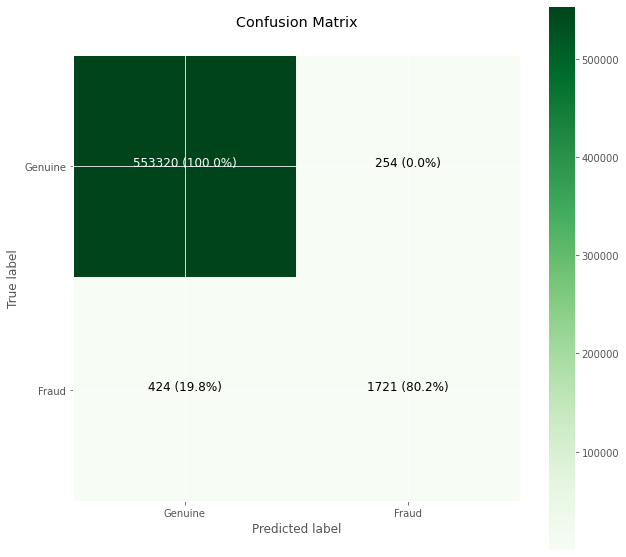

In [ ]:
from sklearn.linear_model import LogisticRegression

model_11_spec = 'Hybrid Model 3 | Model6,7,8 + Output : Logit with L2'

input_estimators = [model_6,model_7,model_8]

output_estimator = LogisticRegression(penalty="l2", C = 0.3,solver="saga")

model_11_eval = hybrid_model_evaluate(input_estimators = input_estimators, output_estimator = output_estimator,
                                    model_id = 'model_11',model_spec = model_11_spec,X_train = X_resampled,y_train = y_resampled)

model_11_eval['best']

> **Model 12 : Ensemble-Chain Model | Output : RandomForestClassifier**

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
17,model_12,Train,0.9,99.90,99.96,99.83,99.90,"Hybrid Model 3 | Model6,7,8 + Output : RandomF...",299.69
0,model_12,Test,0.9,89.72,85.98,79.49,82.61,"Hybrid Model 3 | Model6,7,8 + Output : RandomF...",255.19


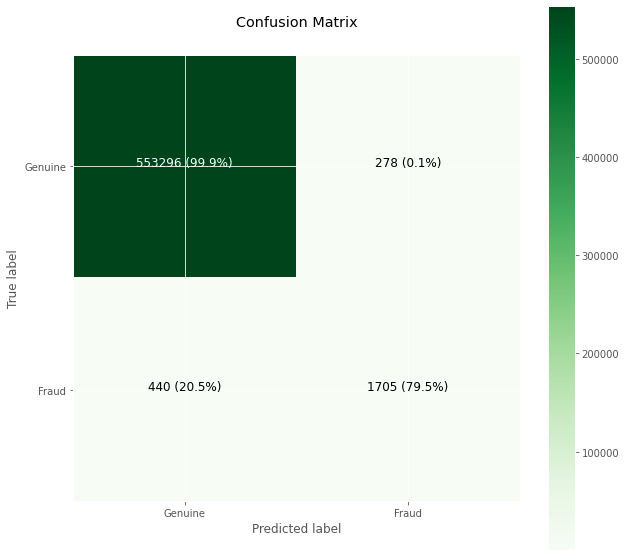

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_12_spec = 'Hybrid Model 3 | Model6,7,8 + Output : RandomForest'

input_estimators = [model_6,model_7,model_8]

output_estimator = RandomForestClassifier(n_estimators = 50, max_depth = 1)

model_12_eval = hybrid_model_evaluate(input_estimators = input_estimators, output_estimator = output_estimator,
                                    model_id = 'model_12',model_spec = model_12_spec,X_train = X_resampled,y_train = y_resampled)

model_12_eval['best']

> **10. Choosing the best Model**

- Compare the models
- Choosing the best model
- Display the model
- Print the feature importances

> **Criteria**

- **We may choose the model with high `roc_auc` with given that model model should be having decent `precision` and `recall`**

> **Lets compare all the model been build till now**

In [ ]:
# list of all the model-eval tables

eval_list = [model_1_eval['all_test'],model_2_eval['all_test'],model_3_eval['all_test'],
             model_4_eval['all_test'],model_5_eval['all_test'],model_6_eval['all_test'],
             model_7_eval['all_test'],model_8_eval['all_test'],model_9_eval['all_test'],
             model_10_eval['all_test'],model_11_eval['all_test'],model_12_eval['all_test']]

# sorting and printing the best models 
# sorting the model in way that it provided best combined value of 'roc_auc', 'precision' and 'recall'

final_eval_table = pd.concat(eval_list, axis = 0)
final_eval_table['sort_weight'] = final_eval_table[['roc_auc','recall','precision']].sum(axis = 1)
final_eval_table.sort_values(by = 'sort_weight', ascending = False, inplace = True)
final_eval_table.head(10)

,model_id,validation on,threshold,roc_auc,precision,recall,f1_score,desc,sort_weight
0,model_6,Test,0.6,90.42,86.19,80.89,83.45,XGBoost | Opmtimize H-Params - Bayesian Search,257.50
0,model_11,Test,0.9,90.09,87.14,80.23,83.54,"Hybrid Model 3 | Model6,7,8 + Output : Logit w...",257.46
0,model_10,Test,0.9,90.93,84.35,81.91,83.11,"Hybrid Model 2 | Model6,7,8 + Output : Logit w...",257.19
0,model_9,Test,0.9,90.49,85.62,81.03,83.26,"Hybrid Model 1 | Model6,7,8 + Output : Logit",257.14
1,model_6,Test,0.7,88.91,90.27,77.86,83.60,XGBoost | Opmtimize H-Params - Bayesian Search,257.04
1,model_11,Test,0.8,90.74,84.53,81.54,83.01,"Hybrid Model 3 | Model6,7,8 + Output : Logit w...",256.81
1,model_9,Test,0.8,91.34,82.67,82.75,82.71,"Hybrid Model 1 | Model6,7,8 + Output : Logit",256.76
2,model_11,Test,0.7,91.20,82.70,82.47,82.59,"Hybrid Model 3 | Model6,7,8 + Output : Logit w...",256.37
2,model_9,Test,0.7,91.83,80.72,83.73,82.20,"Hybrid Model 1 | Model6,7,8 + Output : Logit",256.28
1,model_10,Test,0.8,91.64,81.24,83.36,82.28,"Hybrid Model 2 | Model6,7,8 + Output : Logit w...",256.24





> **Final Model:**

- From the aboev table it is evident that the `model 9 & model 6` having the same features and efficiency.

- **Considerig the complexity, ease of implementation, we can choose the `model 6` as the final model to choose with `threshold = 0.6`**

> Displaying the final model

In [ ]:
print('\nProbability Threshold :', 0.6,'\n') # print the threshold value for the best result

model_6 # print the model object


Probability Threshold : 0.6 



XGBClassifier(class_weight={0: 20, 1: 1}, colsample_bylevel=0.8420635292835258,
              colsample_bytree=0.46822496079668025, gamma=0.5727963303428384,
              lambda=25.603205585229382, learning_rate=0.06587435368095368,
              loss='deviance', max_depth=9,
              min_samples_splits=0.4144879333104471, n_estimators=278,
              random_state=42, reg_lambda=1.4467243548751343,
              subsample=0.6335787009130003)

> Lets look at the feature importance

In [ ]:
importances = model_6.feature_importances_ # access the feature importances from the best model

feature_importance = pd.DataFrame({'variable':X_train.columns, 'importances':importances})

feature_importance # print the feature importances

,variable,importances
0,amt,0.171255
1,state,0.027372
2,city_pop,0.003499
3,trans_hour,0.106834
4,trans_month,0.032227
5,trans_dayofweek,0.046153
6,timedelta_last_trans,0.031129
7,cust_age,0.008693
8,lat_dist_cust_merch,0.001698
9,long_dist_cust_merch,0.001486


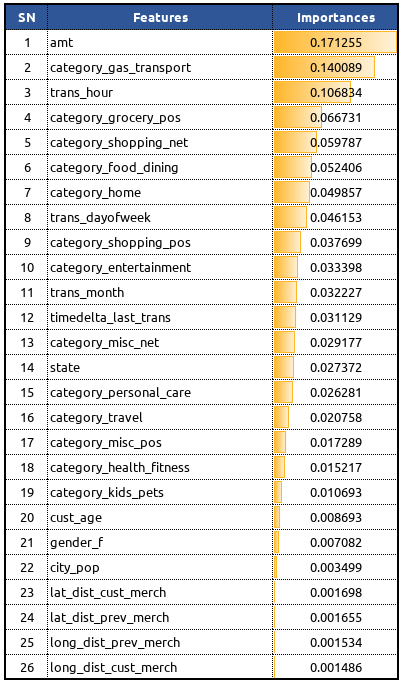

**This is the Enfd of the Document**